# Detecting linguistic traces in scientific fraud  
## About the use of function words and machine learning in scientific fraud detection

In [1]:
import os 
import pandas as pd
import numpy as np
import re
import os
from tika import parser

def process_text(text): 
    '''
    cleans text so that only words remain
    '''
    # remove newline characters 
    text = text.rstrip()

    # remove special characters -> only words
    text = re.sub('[^A-Za-z 1-9.,!?]+', ' ', text)  
    
    return(text)
    
def create_df(top): 
    '''
    creates df from path and author list 
    output is a dataframe with format: Nr | PaperTitle | Text | 
    '''
    # columns for dataframe
    Fraud = []
    File = []
    Text = []

    # walk over directories 
    for (dirname, dirs, files) in os.walk(top): 
        print(dirname, dirs, files)
        for filename in files:
            os.chdir(dirname)
            new_path = os.getcwd()
            
            # look for pdf files 
            if os.path.splitext(filename)[-1] == '.pdf':
                #Status.append(dirname.split(os.path.sep)[-1])
                Fraud.append(1 if os.path.splitext(filename)[-2].endswith('A') else 0)
                File.append(filename) 
                raw_text = parser.from_file(new_path + '/' + filename)['content']
                processed_text = process_text(raw_text)
                Text.append(processed_text)
                
            # Now go back to the top 
            os.chdir(top)    
        
    # create dataframe 
    df = pd.DataFrame({
        'Fraud':Fraud, 
        'Text': Text,
        'File': File,
    })
    return(df)

# change directory to 
os.chdir('/Users/lukasmalik/Desktop/Masterarbeit/dataset_final/raw') 
current = os.getcwd()  
df = create_df(current)

/Users/lukasmalik/Desktop/Masterarbeit/dataset_final/raw [] ['56B.pdf', '17B.pdf', '40B.pdf', '37A.pdf', '83B.pdf', '7B.pdf', '60A.pdf', '95B.pdf', '76A.pdf', '99A.pdf', '21A.pdf', '56A.pdf', '17A.pdf', '40A.pdf', '37B.pdf', '83A.pdf', '7A.pdf', '60B.pdf', '95A.pdf', '76B.pdf', '99B.pdf', '21B.pdf', '20B.pdf', '77B.pdf', '98B.pdf', '94A.pdf', '61B.pdf', '6A.pdf', '82A.pdf', '.DS_Store', '36B.pdf', '41A.pdf', '16A.pdf', '57A.PDF', '20A.pdf', '77A.pdf', '98A.pdf', '94B.pdf', '61A.pdf', '6B.pdf', '82B.pdf', '36A.pdf', '41B.pdf', '16B.pdf', '57B.PDF', '50A.pdf', '11A.pdf', '46A.pdf', '31B.pdf', '85A.pdf', '1A.pdf', '66B.pdf', '89B.pdf', '93A.pdf', '70B.pdf', '27B.pdf', '50B.pdf', '11B.pdf', '46B.pdf', '31A.pdf', '85B.pdf', '1B.pdf', '66A.pdf', '89A.pdf', '93B.pdf', '70A.pdf', '27A.pdf', '26A.pdf', '71A.pdf', '92B.pdf', '67A.pdf', '88A.pdf', '84B.pdf', '30A.pdf', '47B.pdf', '10B.pdf', '51B.pdf', '26B.pdf', '71B.pdf', '92A.pdf', '67B.pdf', '88B.pdf', '84A.pdf', '30B.pdf', '47A.pdf', '10A.pdf

2019-11-12 15:41:28,120 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.19/tika-server-1.19.jar to /var/folders/8s/zcy32jb102jcp0zzc5p5n8nr0000gn/T/tika-server.jar.
2019-11-12 15:41:47,365 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.19/tika-server-1.19.jar.md5 to /var/folders/8s/zcy32jb102jcp0zzc5p5n8nr0000gn/T/tika-server.jar.md5.
2019-11-12 15:41:47,889 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


KeyboardInterrupt: 

In [ ]:
df.head()

In [ ]:
df.Text[1][0:2000]

In [ ]:
len(df)

In [ ]:
### 1.5) Restrict selection 
not_first_author = ["1A.pdf","1B.pdf", 
                      "3A.pdf","3B.pdf",
                      "4A.pdf","4B.pdf",
                      "5A.pdf","5B.pdf",
                      "6A.pdf","6B.pdf",
                      "7A.pdf","7B.pdf",
                      "8A.pdf","8B.pdf",
                      "11A.pdf","11B.pdf",
                      "12A.pdf","12B.pdf",
                      "13A.pdf","13B.pdf",
                      "14A.pdf","14B.pdf",
                      "15A.pdf","15B.pdf",
                      "16A.pdf","16B.pdf",
                      "18A.pdf","18B.pdf",
                      "19A.pdf","19B.pdf",
                      "20A.pdf","20B.pdf",
                      "22A.pdf","22B.pdf",
                      "23A.pdf","23B.pdf",
                      "24A.pdf","24B.pdf",
                      "25A.pdf","25B.pdf",
                      "27A.pdf","27B.pdf",
                      "28A.pdf","28B.pdf",
                      "30A.pdf","30B.pdf",
                      "31A.pdf","31B.pdf",
                      "35A.pdf","35B.pdf",
                      "36A.pdf","36B.pdf",
                      "39A.pdf","39B.pdf",
                      "40A.pdf","40B.pdf",
                      "45A.pdf","45B.pdf",
                      "46A.pdf","46B.pdf",
                      "47A.pdf","47B.pdf",
                      "48A.pdf","48B.pdf",
                      "52A.pdf","52B.pdf",
                      "56A.pdf","56B.pdf",
                      "94A.pdf","94B.pdf",
                      "95A.pdf","95B.pdf",
                      "96A.pdf","96B.pdf",
                      "97A.pdf","97B.pdf"]


df = df[~df.File.isin(not_first_author)]
df = df.reset_index()

In [ ]:
len(df)

In [ ]:
# extract function words 
os.chdir('/Users/lukasmalik/Desktop/Masterarbeit/scripts') 
from Emotion_Detection import *
    
df_features = emo_detect(df['Text'],language='English', method ='discrete')
df_metrics = compute_metrics(df_features,language='English', method ='discrete') 

# add labels to the metrics dataframe 
df_metrics['Fraud'] = df['Fraud']
df_metrics['File'] = df['File']


In [ ]:
df_metrics.columns[50:150]

In [ ]:
%%time
from __future__ import division
import nltk
from tqdm import tqdm

# select relevant columns for analysis 
selection = ['File',
             'Fraud',
             'function_Percent',
             'pronoun_Percent', 
             'ppron_Percent', 
             'i_Percent', 
             'we_Percent',
             'you_Percent', 
             'shehe_Percent', 
             'they_Percent', 
             'ipron_Percent',
             'article_Percent', 
             'prep_Percent', 
             'auxverb_Percent', 
             'adverb_Percent',
             'conj_Percent',
             'negate_Percent', # up to here function words
             'quant_Percent', #obfuscation
             'Detect_Percent', #obfuscation
             'cause_Percent', #obfuscation
             'posemo_Percent' #obfuscation
            ]

data = df_metrics[selection]

# add sentence length 
def get_sentence_length(df): 
    avg_sent_lens = [] 
    for text in df['Text']: 
        #Count number of sentences
        sent_tok = nltk.sent_tokenize(text)
        ns = len(sent_tok)

        #Count number of words
        word_tok = nltk.word_tokenize(text)
        
        NoWord = [',','(',')',':',';','.','%','\x96','{','}','[',']','!','?',"''","``"]
        word_tok2 = [i for i in word_tok if i not in NoWord]
        nw = len(word_tok2)

        #Average Sentence length are words divided by sentences
        avg_sent_lens.append(float(nw)/ns)
    return avg_sent_lens

# unique words 
def get_unique_words(df): 
    percent_unique = [] 
    for text in df['Text']: 
        #Count number of words
        word_tok = nltk.word_tokenize(text)
        NoWord = [',','(',')',':',';','.','%','\x96','{','}','[',']','!','?',"''","``"]
        word_tok2 = [i for i in word_tok if i not in NoWord]
        nw = len(word_tok2)
        nuw = len(set(word_tok2))

        #Average Sentence length are words divided by sentences
        percent_unique.append(float(nuw)/nw)
    return percent_unique

# obfuscation index 

# readability index 
def get_flesch_kinc(df):
    from textstat.textstat import textstat
    fks = [] 
    for text in df['Text']: 
        fk = textstat.flesch_reading_ease(text)/100
        fks.append(fk)
    return fks 

# obfuscation score 
def get_obfuscation(df): 
    from sklearn import preprocessing

    # features needed
    df['jargon'] = 1 - df['Detect_Percent'] 
    df['abstraction'] = 1 / (df['article_Percent'] + df['prep_Percent'] + df['quant_Percent'] )
    
    # scale the features z transformation 
    scaler_fit = preprocessing.StandardScaler().fit(df[['cause_Percent','posemo_Percent','flesch_kincaid']])
    
    df[['cause_Percent','abstraction','jargon','posemo_Percent','flesch_kincaid']] = preprocessing.StandardScaler().fit_transform(df[['cause_Percent','abstraction','jargon','posemo_Percent','flesch_kincaid']])
    df['obfuscation_index'] = (df['cause_Percent'] + df['abstraction'] + df['jargon'] ) - (df['posemo_Percent'] + df['flesch_kincaid'])
    
    # scale back 
    df[['cause_Percent','posemo_Percent','flesch_kincaid']] = scaler_fit.inverse_transform(df[['cause_Percent','posemo_Percent','flesch_kincaid']])
    
    return df

# get vader sentiment 
def get_vader(df): 
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()
    vader_negative = []
    vader_positive = []
    vader_neutral = []
    vader_compound = []

    for text in tqdm(df['Text']):
        vs = analyzer.polarity_scores(text)
        vader_negative.append(vs['neg'])
        vader_positive.append(vs['pos'])
        vader_neutral.append(vs['neu'])
        vader_compound.append(vs['compound'])
    
    return vader_negative, vader_positive, vader_neutral, vader_compound


# get features 
data['avg_sent'] = get_sentence_length(df)
data['unique_word_perc'] = get_unique_words(df)
data['flesch_kincaid'] = get_flesch_kinc(df)
data['vader_negative'],data['vader_positive'],data['vader_neutral'],data['vader_compound'] = get_vader(df)
data = get_obfuscation(data) # this requires other columns from data dataframe 


In [ ]:
data.columns

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
# remove duplicate pos emo column
data = data.loc[:,~data.columns.duplicated()]

In [ ]:
import os 
os.chdir('/Users/lukasmalik/Desktop/Masterarbeit/dataset_final/preprocessed') 

# save the processed data as csv 
data.to_csv("augmented_data.csv", index=False)

In [69]:
## Load the data 

In [2]:
import os 
os.chdir('/Users/lukasmalik/Desktop/Masterarbeit/dataset_final/preprocessed') 

# open the data as csv 
data= pd.read_csv("augmented_data.csv")

In [3]:
data.columns

Index(['File', 'Fraud', 'function_Percent', 'pronoun_Percent', 'ppron_Percent',
       'i_Percent', 'we_Percent', 'you_Percent', 'shehe_Percent',
       'they_Percent', 'ipron_Percent', 'article_Percent', 'prep_Percent',
       'auxverb_Percent', 'adverb_Percent', 'conj_Percent', 'negate_Percent',
       'quant_Percent', 'Detect_Percent', 'cause_Percent', 'posemo_Percent',
       'avg_sent', 'unique_word_perc', 'flesch_kincaid', 'vader_negative',
       'vader_positive', 'vader_neutral', 'vader_compound', 'jargon',
       'abstraction', 'obfuscation_index'],
      dtype='object')

In [4]:
data.head()

,File,Fraud,function_Percent,pronoun_Percent,ppron_Percent,i_Percent,we_Percent,you_Percent,shehe_Percent,they_Percent,...,avg_sent,unique_word_perc,flesch_kincaid,vader_negative,vader_positive,vader_neutral,vader_compound,jargon,abstraction,obfuscation_index
0,17B.pdf,0,0.367920,0.053640,0.023506,0.002175,0.012012,0.001036,0.000828,0.007456,...,17.490842,0.189529,0.5392,0.105,0.137,0.758,0.9998,-1.305017,-0.496078,-3.289486
1,37A.pdf,1,0.349375,0.051566,0.021223,0.002868,0.009177,0.002008,0.003155,0.004015,...,21.847909,0.133136,0.5913,0.046,0.086,0.868,1.0000,-0.630976,-0.118066,0.904052
2,83B.pdf,0,0.278591,0.027769,0.010152,0.001493,0.006271,0.000000,0.000299,0.002090,...,16.428571,0.358621,0.5371,0.120,0.047,0.833,-0.9998,0.344984,0.090134,1.635087
3,60A.pdf,1,0.086983,0.005981,0.001622,0.000608,0.000811,0.000203,0.000000,0.000000,...,51.915344,0.150428,1.0999,0.039,0.025,0.936,-0.9983,3.661586,5.160413,4.424636
4,76A.pdf,1,0.280119,0.017018,0.006213,0.000540,0.002431,0.000270,0.000270,0.002701,...,18.984375,0.335802,0.5300,0.109,0.057,0.834,-0.9996,0.269507,-0.204374,0.952007


In [5]:
len(data)

120

## ANALYSIS WITH FUNCTION WORDS ONLY 

In [6]:
col_names = ['File', 'Fraud', 'function word percent', 'pronoun percent', 'personal pronoun percent',
       'i percent', 'we percent', 'you percent', 'she he percent',
       'they percent', 'impersonal pronoun percent', 'article percent', 'prepositions percent',
       'auxilliary verbs percent', 'adverb percent', 'conjunction words percent', 'negatations percent',
       'quantifier percent', 'detect percent', 'causations percent', 'positive emotion percent',
       'average sentence length', 'unique words percentage', 'flesch-kincaid score', 'vader negative score',
       'vader positive score', 'vader neutral score', 'vader compound score', 'jargon',
       'abstraction', 'obfuscation index']

data.columns = col_names

In [7]:
# select columns for analysis 
fw_features = ['File','Fraud',
               'function word percent', 'pronoun percent', 'personal pronoun percent', 'i percent', 
               'we percent', 'you percent', 'she he percent', 'they percent', 'impersonal pronoun percent',
               'article percent', 'prepositions percent', 'auxilliary verbs percent',
               'adverb percent', 'conjunction words percent', 'negatations percent']

       

# broader selection  
more_features = ['File', 'Fraud', 'function word percent', 'pronoun percent',
       'personal pronoun percent', 'i percent', 'we percent', 'you percent',
       'she he percent', 'they percent', 'impersonal pronoun percent',
       'article percent', 'prepositions percent', 'auxilliary verbs percent',
       'adverb percent', 'conjunction words percent', 'negatations percent',
       'quantifier percent', 'detect percent', 'causations percent',
       'positive emotion percent', 'average sentence length',
       'unique words percentage', 'flesch-kincaid score',
       'vader negative score', 'vader positive score', 'vader neutral score',
       'vader compound score', 'jargon', 'abstraction', 'obfuscation index']

In [8]:
# only function word features
data_fw = data[fw_features]
data = data[more_features]

In [9]:
data.columns

Index(['File', 'Fraud', 'function word percent', 'pronoun percent',
       'personal pronoun percent', 'i percent', 'we percent', 'you percent',
       'she he percent', 'they percent', 'impersonal pronoun percent',
       'article percent', 'prepositions percent', 'auxilliary verbs percent',
       'adverb percent', 'conjunction words percent', 'negatations percent',
       'quantifier percent', 'detect percent', 'causations percent',
       'positive emotion percent', 'average sentence length',
       'unique words percentage', 'flesch-kincaid score',
       'vader negative score', 'vader positive score', 'vader neutral score',
       'vader compound score', 'jargon', 'abstraction', 'obfuscation index'],
      dtype='object')

In [10]:
data.head()

,File,Fraud,function word percent,pronoun percent,personal pronoun percent,i percent,we percent,you percent,she he percent,they percent,...,average sentence length,unique words percentage,flesch-kincaid score,vader negative score,vader positive score,vader neutral score,vader compound score,jargon,abstraction,obfuscation index
0,17B.pdf,0,0.367920,0.053640,0.023506,0.002175,0.012012,0.001036,0.000828,0.007456,...,17.490842,0.189529,0.5392,0.105,0.137,0.758,0.9998,-1.305017,-0.496078,-3.289486
1,37A.pdf,1,0.349375,0.051566,0.021223,0.002868,0.009177,0.002008,0.003155,0.004015,...,21.847909,0.133136,0.5913,0.046,0.086,0.868,1.0000,-0.630976,-0.118066,0.904052
2,83B.pdf,0,0.278591,0.027769,0.010152,0.001493,0.006271,0.000000,0.000299,0.002090,...,16.428571,0.358621,0.5371,0.120,0.047,0.833,-0.9998,0.344984,0.090134,1.635087
3,60A.pdf,1,0.086983,0.005981,0.001622,0.000608,0.000811,0.000203,0.000000,0.000000,...,51.915344,0.150428,1.0999,0.039,0.025,0.936,-0.9983,3.661586,5.160413,4.424636
4,76A.pdf,1,0.280119,0.017018,0.006213,0.000540,0.002431,0.000270,0.000270,0.002701,...,18.984375,0.335802,0.5300,0.109,0.057,0.834,-0.9996,0.269507,-0.204374,0.952007


In [11]:
data = data.loc[:,~data.columns.duplicated()]

In [12]:
X = data.drop(['Fraud','File'], axis=1).set_index(data.File)
Y = data['Fraud']

In [13]:
# get a z transformed, standardized version of X, X_s
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X_s = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [14]:
X.head()

,function word percent,pronoun percent,personal pronoun percent,i percent,we percent,you percent,she he percent,they percent,impersonal pronoun percent,article percent,...,average sentence length,unique words percentage,flesch-kincaid score,vader negative score,vader positive score,vader neutral score,vader compound score,jargon,abstraction,obfuscation index
File,,,,,,,,,,,,,,,,,,,,,
17B.pdf,0.367920,0.053640,0.023506,0.002175,0.012012,0.001036,0.000828,0.007456,0.030134,0.075489,...,17.490842,0.189529,0.5392,0.105,0.137,0.758,0.9998,-1.305017,-0.496078,-3.289486
37A.pdf,0.349375,0.051566,0.021223,0.002868,0.009177,0.002008,0.003155,0.004015,0.030343,0.067971,...,21.847909,0.133136,0.5913,0.046,0.086,0.868,1.0000,-0.630976,-0.118066,0.904052
83B.pdf,0.278591,0.027769,0.010152,0.001493,0.006271,0.000000,0.000299,0.002090,0.017617,0.042699,...,16.428571,0.358621,0.5371,0.120,0.047,0.833,-0.9998,0.344984,0.090134,1.635087
60A.pdf,0.086983,0.005981,0.001622,0.000608,0.000811,0.000203,0.000000,0.000000,0.004359,0.013990,...,51.915344,0.150428,1.0999,0.039,0.025,0.936,-0.9983,3.661586,5.160413,4.424636
76A.pdf,0.280119,0.017018,0.006213,0.000540,0.002431,0.000270,0.000270,0.002701,0.010805,0.050783,...,18.984375,0.335802,0.5300,0.109,0.057,0.834,-0.9996,0.269507,-0.204374,0.952007


In [15]:
X_s.head()

,function word percent,pronoun percent,personal pronoun percent,i percent,we percent,you percent,she he percent,they percent,impersonal pronoun percent,article percent,...,average sentence length,unique words percentage,flesch-kincaid score,vader negative score,vader positive score,vader neutral score,vader compound score,jargon,abstraction,obfuscation index
0,1.194738,1.202102,1.443990,0.066668,2.251333,0.122782,0.081566,0.915633,0.897619,0.991249,...,-0.270952,-0.876025,-0.709478,0.744480,2.205045,-2.172109,1.071108,-1.305017,-0.496078,-2.108493
1,0.885079,1.078567,1.153589,0.480289,1.388740,0.954269,2.064047,0.040408,0.918908,0.513885,...,0.391499,-1.738341,-0.280037,-0.711575,0.558927,0.257090,1.071310,-0.630976,-0.118066,0.579479
2,-0.296866,-0.338870,-0.254386,-0.339936,0.504115,-0.762993,-0.369939,-0.449270,-0.374719,-1.090607,...,-0.432461,1.709604,-0.726787,1.114664,-0.699869,-0.515837,-0.943204,0.344984,0.090134,1.048057
3,-3.496306,-1.636683,-1.339271,-0.867699,-1.157291,-0.589556,-0.624400,-0.980974,-1.722438,-2.913363,...,4.962977,-1.473925,3.912167,-0.884327,-1.409959,1.758777,-0.941693,3.661586,5.160413,2.836101
4,-0.271348,-0.979294,-0.755407,-0.908277,-0.664274,-0.531931,-0.394203,-0.293825,-1.067209,-0.577346,...,-0.043875,1.360685,-0.785310,0.843196,-0.377101,-0.493753,-0.943003,0.269507,-0.204374,0.610217


### Do function word frequencies differ for fraudulent scientific articles and unsuspicious articles? 

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style 

style.use('ggplot')
sns.set_context('talk')

In [17]:
#sns.choose_colorbrewer_palette('qualitative')

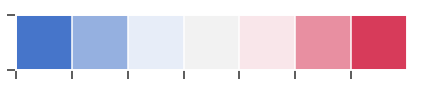

In [18]:
sns.palplot(sns.diverging_palette(255, 5, sep=80, n=7))

In [19]:
myp = sns.diverging_palette(255, 5, sep=80, n=2)

In [20]:
data.head()

,File,Fraud,function word percent,pronoun percent,personal pronoun percent,i percent,we percent,you percent,she he percent,they percent,...,average sentence length,unique words percentage,flesch-kincaid score,vader negative score,vader positive score,vader neutral score,vader compound score,jargon,abstraction,obfuscation index
0,17B.pdf,0,0.367920,0.053640,0.023506,0.002175,0.012012,0.001036,0.000828,0.007456,...,17.490842,0.189529,0.5392,0.105,0.137,0.758,0.9998,-1.305017,-0.496078,-3.289486
1,37A.pdf,1,0.349375,0.051566,0.021223,0.002868,0.009177,0.002008,0.003155,0.004015,...,21.847909,0.133136,0.5913,0.046,0.086,0.868,1.0000,-0.630976,-0.118066,0.904052
2,83B.pdf,0,0.278591,0.027769,0.010152,0.001493,0.006271,0.000000,0.000299,0.002090,...,16.428571,0.358621,0.5371,0.120,0.047,0.833,-0.9998,0.344984,0.090134,1.635087
3,60A.pdf,1,0.086983,0.005981,0.001622,0.000608,0.000811,0.000203,0.000000,0.000000,...,51.915344,0.150428,1.0999,0.039,0.025,0.936,-0.9983,3.661586,5.160413,4.424636
4,76A.pdf,1,0.280119,0.017018,0.006213,0.000540,0.002431,0.000270,0.000270,0.002701,...,18.984375,0.335802,0.5300,0.109,0.057,0.834,-0.9996,0.269507,-0.204374,0.952007


In [21]:
summary = data.describe().round(3)

In [22]:
summary["prepositions percent"]

count    120.000
mean       0.114
std        0.019
min        0.042
25%        0.109
50%        0.117
75%        0.125
max        0.149
Name: prepositions percent, dtype: float64

In [23]:
summary.columns

Index(['Fraud', 'function word percent', 'pronoun percent',
       'personal pronoun percent', 'i percent', 'we percent', 'you percent',
       'she he percent', 'they percent', 'impersonal pronoun percent',
       'article percent', 'prepositions percent', 'auxilliary verbs percent',
       'adverb percent', 'conjunction words percent', 'negatations percent',
       'quantifier percent', 'detect percent', 'causations percent',
       'positive emotion percent', 'average sentence length',
       'unique words percentage', 'flesch-kincaid score',
       'vader negative score', 'vader positive score', 'vader neutral score',
       'vader compound score', 'jargon', 'abstraction', 'obfuscation index'],
      dtype='object')

In [24]:
summary["negatations percent"]

count    120.000
mean       0.007
std        0.003
min        0.002
25%        0.005
50%        0.006
75%        0.008
max        0.022
Name: negatations percent, dtype: float64

In [25]:
summary["quantifier percent"]

count    120.000
mean       0.017
std        0.007
min        0.004
25%        0.013
50%        0.016
75%        0.021
max        0.037
Name: quantifier percent, dtype: float64

In [44]:
control_summary = data[data['Fraud'] == 0].describe().round(3)
control_summary.to_excel("control_summary.xlsx")

In [45]:
fraud_summary = data[data['Fraud'] == 1].describe().round(3)
fraud_summary.to_excel("fraud_summary.xlsx")

In [33]:
wf.head()

,Fraud,Function Word Group,Percentage
0,0,pronoun percent,0.053640
1,1,pronoun percent,0.051566
2,0,pronoun percent,0.027769
3,1,pronoun percent,0.005981
4,1,pronoun percent,0.017018


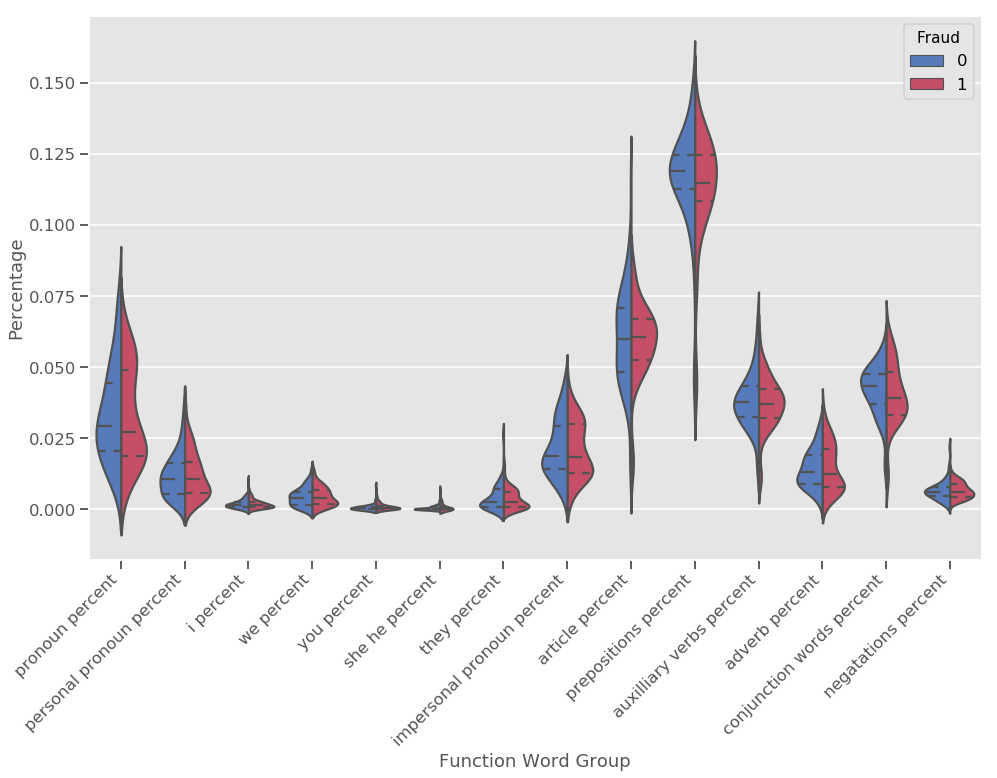

In [26]:
wf = data_fw.drop(['File','function word percent'],axis=1).melt(var_name='Function Word Group', value_name='Percentage', id_vars='Fraud') # this is necessary for seaborn to work 

# plot violin
plt.figure(figsize=(16, 10))
fig = sns.violinplot(x="Function Word Group", y= "Percentage", hue="Fraud",
                    data= wf, palette=myp, split=True, inner = 'quartile')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45,horizontalalignment='right')

plt.show(fig)


In [30]:
# plot significant features 
feat = data.drop('File',axis=1).melt(var_name='Feature', value_name='Z-Score', id_vars='Fraud') # this is necessary for seaborn to work 



In [32]:
feat.head()

,Fraud,Feature,Z-Score
0,0,function word percent,0.367920
1,1,function word percent,0.349375
2,0,function word percent,0.278591
3,1,function word percent,0.086983
4,1,function word percent,0.280119


In [29]:
# plot significant features 
feat = data.drop('File',axis=1).melt(var_name='Feature', value_name='Z-Score', id_vars='Fraud') # this is necessary for seaborn to work 

# plot violin
plt.figure(figsize=(16, 10))

significant = feat[feat['Feature'].isin(['quantifier percent', 'causations percent', 'vader negative score', 'obfuscation index'])]
                     
fig = sns.violinplot(x="Feature", y= "Percentage", hue="Fraud",
                    data= significant, palette=myp, split=True,inner = 'quartile')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45,horizontalalignment='right')

plt.show(fig)

ValueError: Could not interpret input 'Percentage'

<Figure size 1152x720 with 0 Axes>

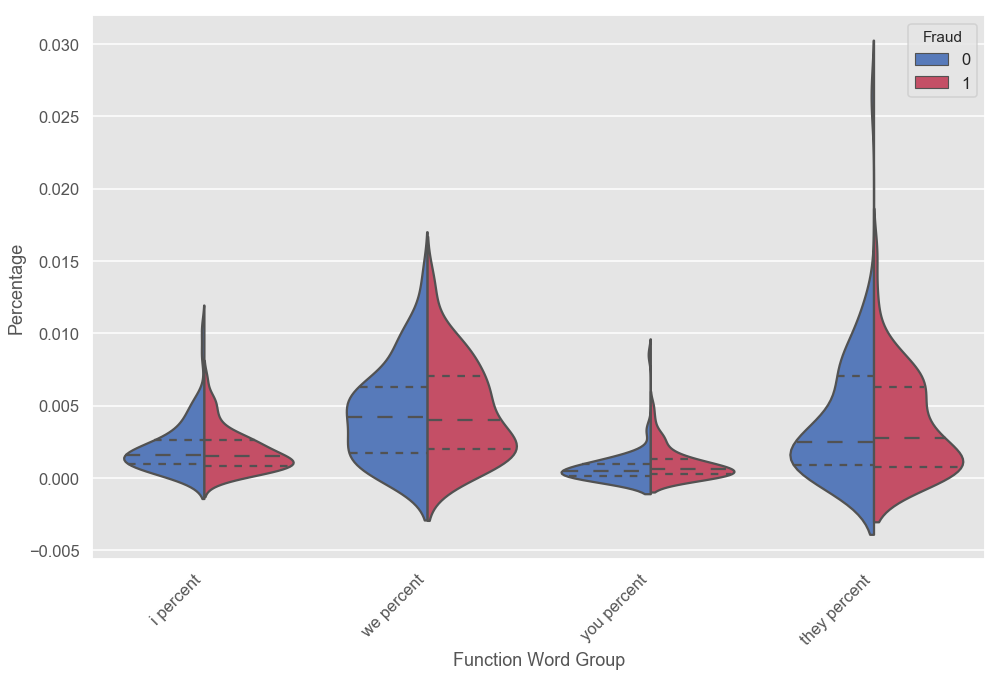

In [287]:
### Now the additional features 
add_f = data.drop('File',axis=1).melt(var_name='Feature', value_name='Z-Score', id_vars='Fraud') # this is necessary for seaborn to work 

# plot violin
plt.figure(figsize=(16, 10))

 = wf[wf['Function Word Group'].isin(['i percent','we percent', 'you percent', 'shehe percent','they percent'])]
                     
fig = sns.violinplot(x="Function Word Group", y= "Percentage", hue="Fraud",
                    data= isheheyouwethey, palette=myp, split=True,inner = 'quartile')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45,horizontalalignment='right')

plt.show(fig)

In [85]:
### Now the additional features 
add_f = data.drop('File',axis=1).melt(var_name='Feature', value_name='Z-Score', id_vars='Fraud') # this is necessary for seaborn to work 

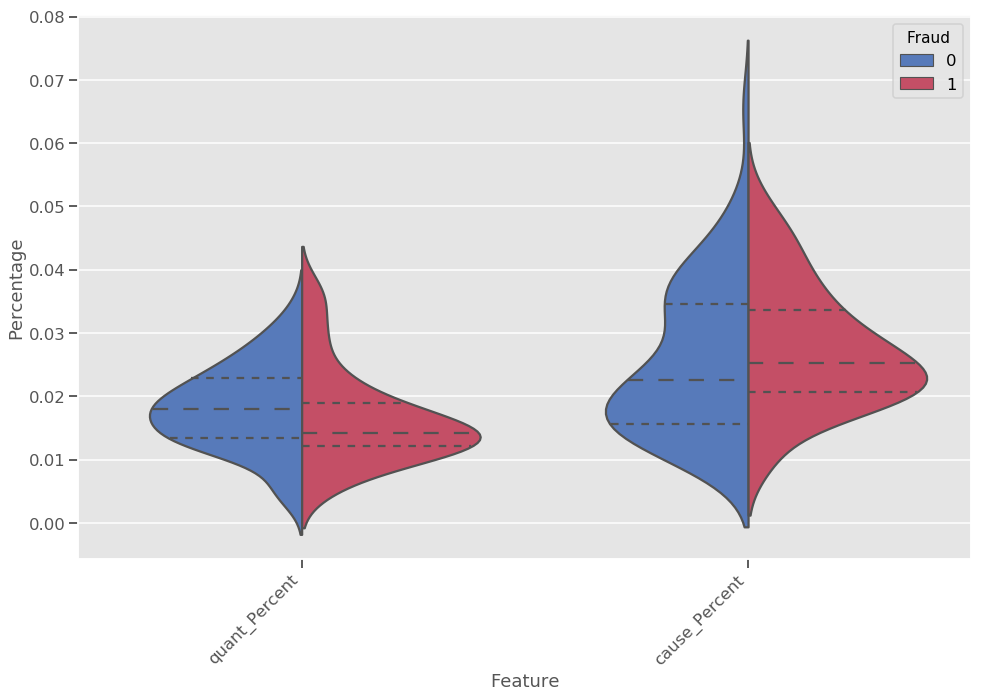

In [86]:
# 'quant_Percent', 'Detect_Percent', 'cause_Percent'
plt.figure(figsize=(16, 10))

quantCause = add_f[add_f['Feature'].isin(['quant_Percent', 'cause_Percent'])]
                     
fig = sns.violinplot(x='Feature', y= 'Z-Score', hue="Fraud",
                    data= quantCause, palette=myp, split=True,inner = 'quartile')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45,horizontalalignment='right') # change y value to Percentage
fig.set(xlabel='Feature', ylabel='Percentage')

plt.show(fig)

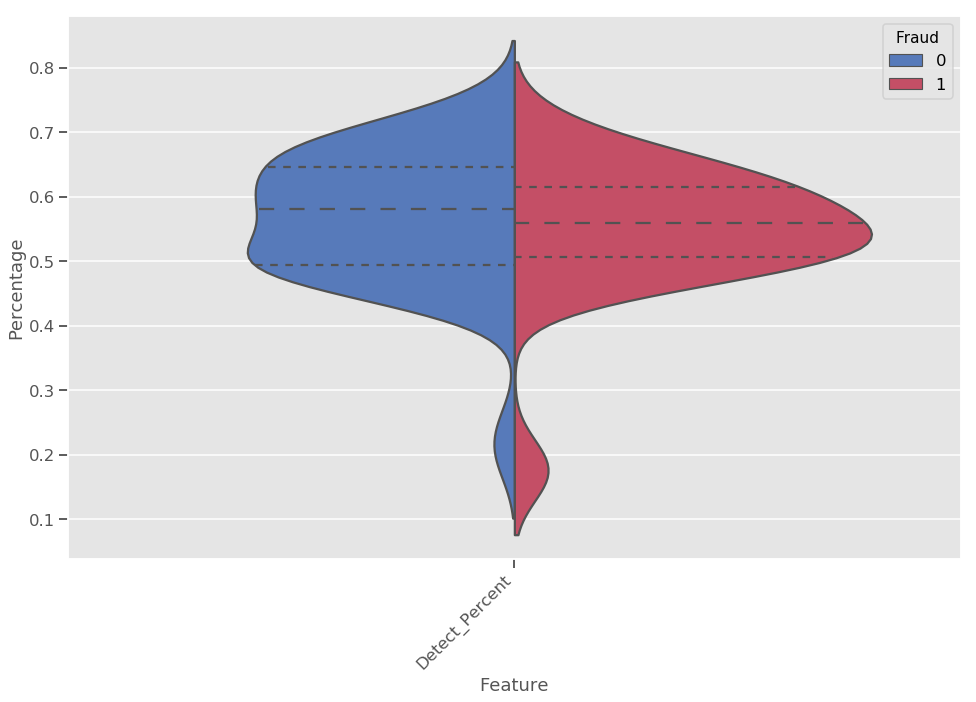

In [87]:
plt.figure(figsize=(16, 10))

detect = add_f[add_f['Feature'].isin(['Detect_Percent'])]
                     
fig = sns.violinplot(x='Feature', y= 'Z-Score', hue="Fraud",
                    data= detect, palette=myp, split=True,inner = 'quartile')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45,horizontalalignment='right') # change y value to Percentage
fig.set(xlabel='Feature', ylabel='Percentage')

plt.show(fig) 

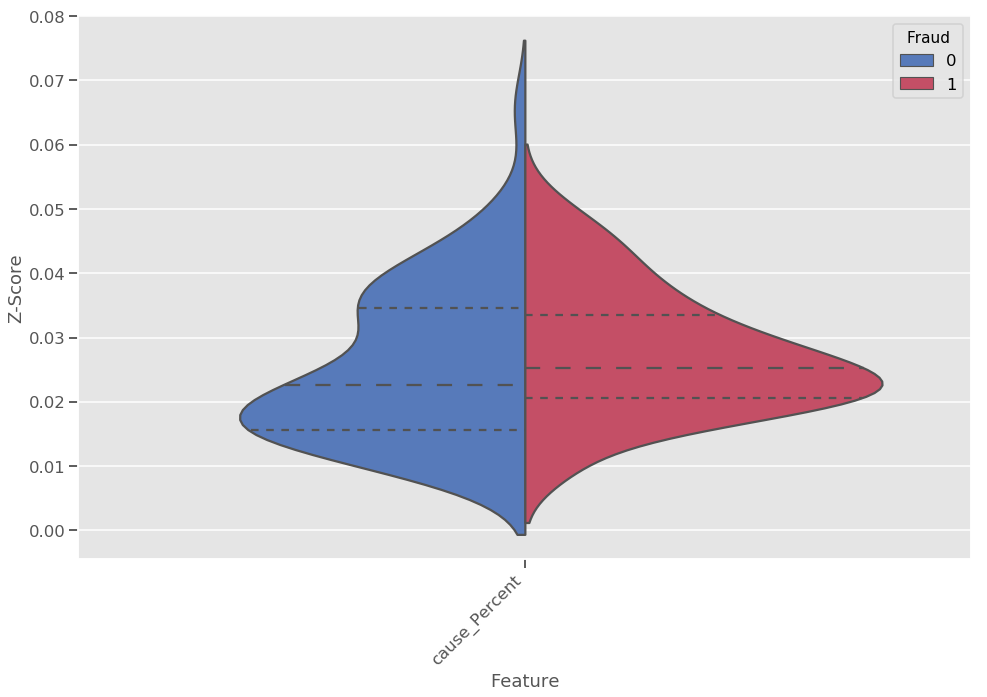

In [88]:
# 'quant_Percent', 'Detect_Percent', 'cause_Percent'
plt.figure(figsize=(16, 10))

quantDetectCause = add_f[add_f['Feature'].isin(['cause_Percent'])]
                     
fig = sns.violinplot(x='Feature', y= 'Z-Score', hue="Fraud",
                    data= quantDetectCause, palette=myp, split=True,inner = 'quartile')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45,horizontalalignment='right') # change y value to Percentage

plt.show(fig)

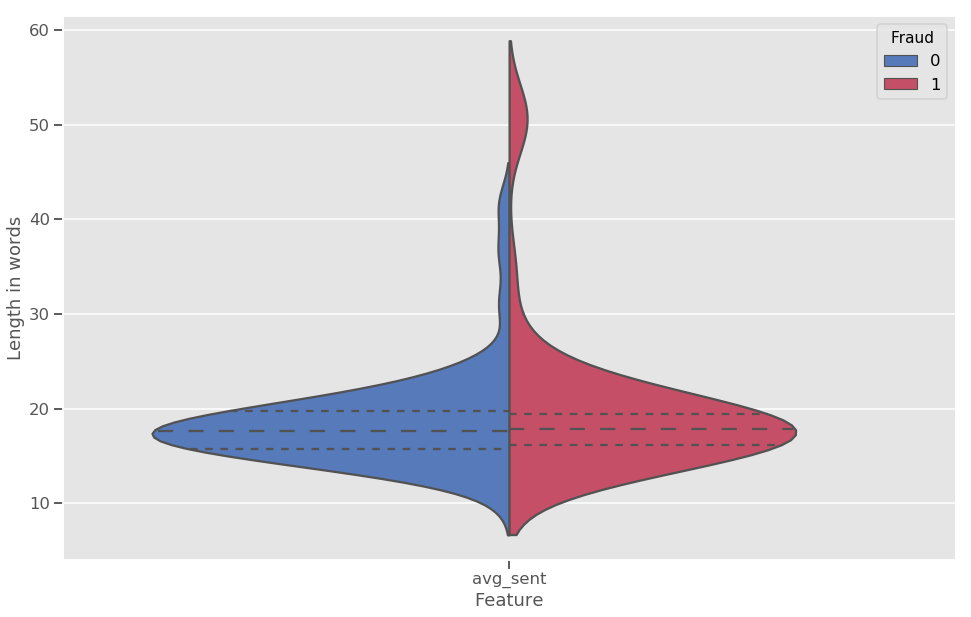

In [89]:
# 'average sentence length'
plt.figure(figsize=(16, 10))

unique = add_f[add_f['Feature'].isin(['avg_sent'])]
                     
fig = sns.violinplot(x='Feature', y= 'Z-Score', hue="Fraud",
                    data= unique, palette=myp, split=True,inner = 'quartile')
fig.set_xticklabels(fig.get_xticklabels()) # change y value to Percentage
fig.set(xlabel='Feature', ylabel='Length in words')

plt.show(fig)

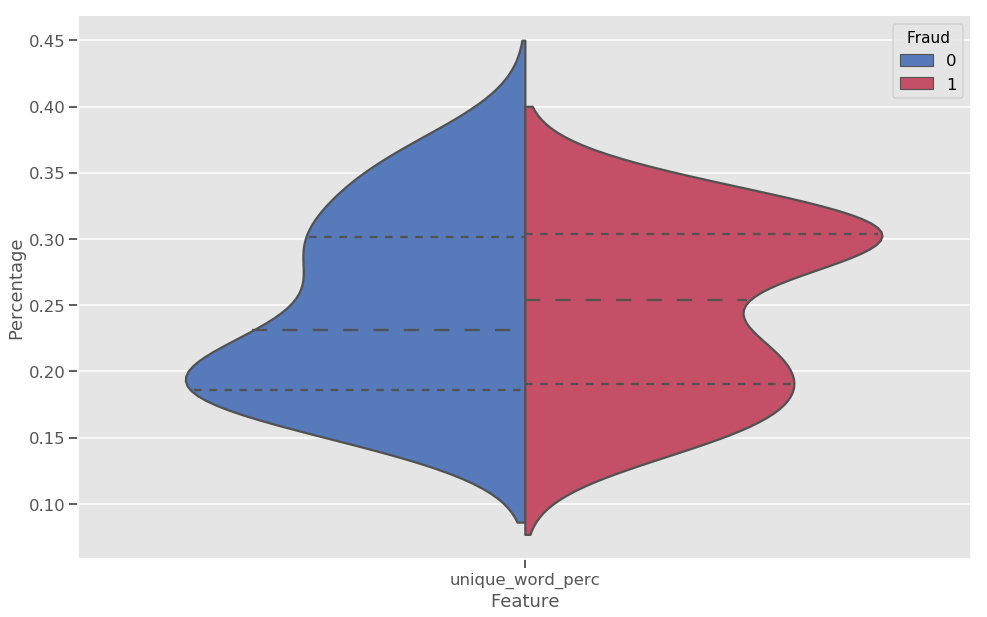

In [90]:
# 'unique_word_perc'
plt.figure(figsize=(16, 10))

unique = add_f[add_f['Feature'].isin(['unique_word_perc'])]
                     
fig = sns.violinplot(x='Feature', y= 'Z-Score', hue="Fraud",
                    data= unique, palette=myp, split=True,inner = 'quartile')
fig.set_xticklabels(fig.get_xticklabels()) # change y value to Percentage
fig.set(xlabel='Feature', ylabel='Percentage')

plt.show(fig)


In [91]:
X_s.columns

Index(['function_Percent', 'pronoun_Percent', 'ppron_Percent', 'i_Percent',
       'we_Percent', 'you_Percent', 'shehe_Percent', 'they_Percent',
       'ipron_Percent', 'article_Percent', 'prep_Percent', 'auxverb_Percent',
       'adverb_Percent', 'conj_Percent', 'negate_Percent', 'quant_Percent',
       'Detect_Percent', 'cause_Percent', 'posemo_Percent', 'avg_sent',
       'unique_word_perc', 'flesch_kincaid', 'vader_negative',
       'vader_positive', 'vader_neutral', 'vader_compound', 'jargon',
       'abstraction', 'posemo_Percent', 'obfuscation_index'],
      dtype='object')

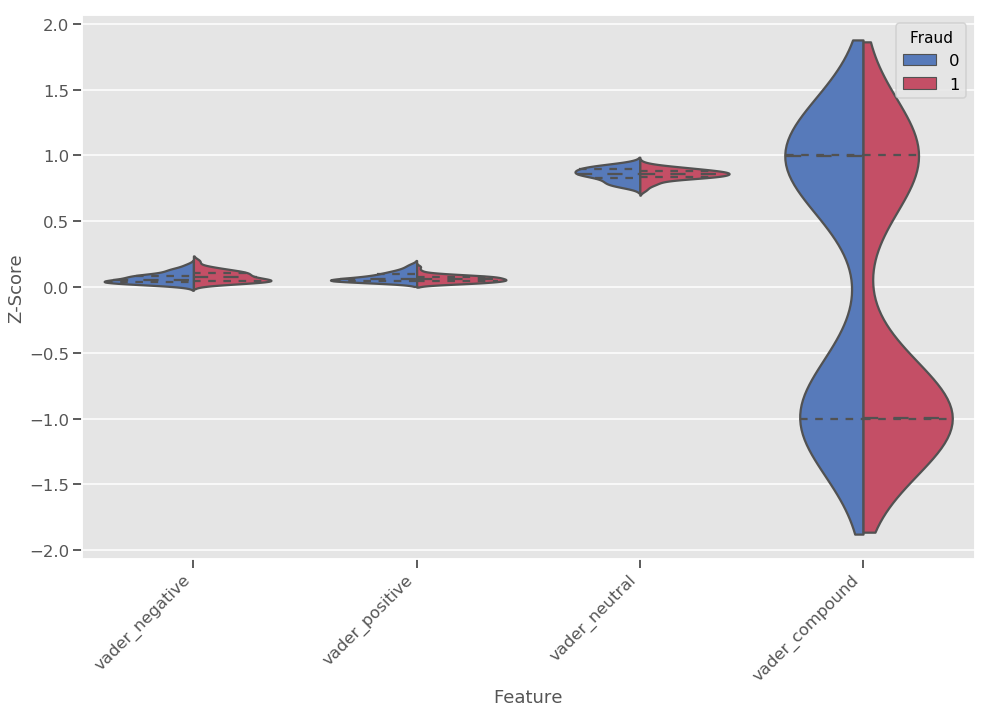

In [92]:
# vader pos neg compound 
plt.figure(figsize=(16, 10))

vader = add_f[add_f['Feature'].isin(['vader_negative', 'vader_positive', 'vader_neutral', 'vader_compound'])]
                     
fig = sns.violinplot(x='Feature', y= 'Z-Score', hue="Fraud",
                    data= vader, palette=myp, split=True,inner = 'quartile')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45,horizontalalignment='right') # change y value to Percentage

plt.show(fig)

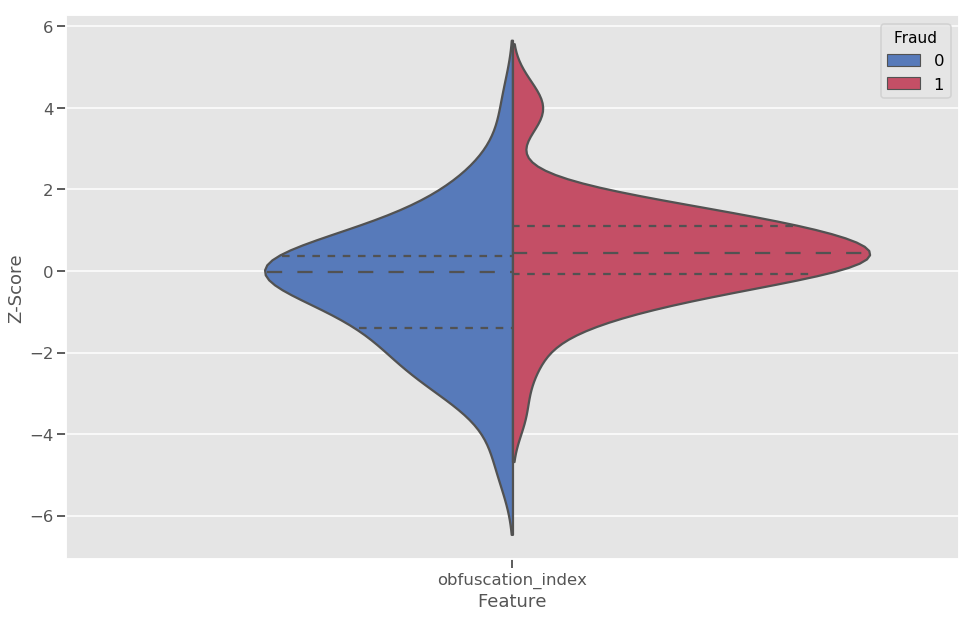

In [93]:
# obfuscation_index
plt.figure(figsize=(16, 10))

obfuscation = add_f[add_f['Feature'].isin(['obfuscation_index'])]
                     
fig = sns.violinplot(x='Feature', y= 'Z-Score', hue="Fraud",
                    data= obfuscation, palette=myp, split=True, inner = 'quartile')
fig.set_xticklabels(fig.get_xticklabels())

plt.show(fig)

In [94]:
summary_statistic = X.groupby('Fraud'.describe()
summary_statistic.to_csv("data_summary.csv", index=True)

In [95]:
summary_statistic

,function_Percent,pronoun_Percent,ppron_Percent,i_Percent,we_Percent,you_Percent,shehe_Percent,they_Percent,ipron_Percent,article_Percent,...,unique_word_perc,flesch_kincaid,vader_negative,vader_positive,vader_neutral,vader_compound,jargon,abstraction,posemo_Percent,obfuscation_index
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,...,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,1.200000e+02,120.000000,1.200000e+02
mean,0.296369,0.033459,0.012152,0.002063,0.004614,0.000892,0.000733,0.003856,0.021303,0.059877,...,0.246818,0.625274,0.074833,0.068683,0.856358,-0.063485,2.633888e-16,-3.233525e-16,0.012997,7.031412e-16
std,0.060139,0.016859,0.007896,0.001683,0.003300,0.001174,0.001178,0.003948,0.009879,0.015816,...,0.065671,0.121829,0.040690,0.031112,0.045472,0.996858,1.004193e+00,1.004193e+00,0.007647,1.566654e+00
min,0.086983,0.005981,0.001580,0.000000,0.000000,0.000000,0.000000,0.000000,0.004124,0.013990,...,0.133136,0.411300,0.009000,0.022000,0.734000,-1.000000,-1.827870e+00,-1.017453e+00,0.002523,-4.966597e+00
25%,0.268242,0.019268,0.005608,0.000897,0.001946,0.000203,0.000000,0.000778,0.013063,0.050892,...,0.189428,0.546775,0.042000,0.046750,0.829750,-0.999725,-6.422623e-01,-3.837266e-01,0.007564,-7.320724e-01
50%,0.294267,0.029272,0.010657,0.001565,0.004197,0.000551,0.000273,0.002588,0.018789,0.060418,...,0.238263,0.617700,0.068500,0.061000,0.860000,-0.984950,-5.270895e-02,-2.249419e-01,0.011218,1.164844e-01
75%,0.340927,0.046958,0.016664,0.002652,0.006584,0.001113,0.000931,0.006440,0.030041,0.069071,...,0.303090,0.656975,0.101250,0.082250,0.889000,0.999800,5.299680e-01,-3.617874e-02,0.016311,8.953208e-01
max,0.414341,0.077605,0.036525,0.010299,0.014117,0.008528,0.006987,0.026375,0.045512,0.115604,...,0.389914,1.099900,0.199000,0.171000,0.942000,1.000000,3.661586e+00,5.222437e+00,0.045993,4.424636e+00


In [96]:
summary_statistic.columns

Index(['function_Percent', 'pronoun_Percent', 'ppron_Percent', 'i_Percent',
       'we_Percent', 'you_Percent', 'shehe_Percent', 'they_Percent',
       'ipron_Percent', 'article_Percent', 'prep_Percent', 'auxverb_Percent',
       'adverb_Percent', 'conj_Percent', 'negate_Percent', 'quant_Percent',
       'Detect_Percent', 'cause_Percent', 'posemo_Percent', 'avg_sent',
       'unique_word_perc', 'flesch_kincaid', 'vader_negative',
       'vader_positive', 'vader_neutral', 'vader_compound', 'jargon',
       'abstraction', 'posemo_Percent', 'obfuscation_index'],
      dtype='object')

In [114]:
# Kolgomorov Smirnov Test for distributions 
from scipy import stats

sig_count = 0
non_sig_count = 0

summary = pd.DataFrame(columns = ['feature', 'statistic', 'p_value'])

for feature in X.columns: 
    case_distribution = X[(Y == 1).values][feature]
    control_distribution = X[(Y == 0).values][feature]
    stat, p_value = stats.ks_2samp(case_distribution, control_distribution)
    if float(p_value) < 0.05: 
        print("For " + str(feature) + " p_value = " + str(round(p_value,3)) + " IS sign." + " And stat: " + str(round(stat,3)))
        sig_count += 1
        summary = summary.append({'feature':str(feature),'p_value':str(round(p_value,3)), 'statistic':str(round(stat,3))}, ignore_index = True) 
    else: 
        print("For " + str(feature) + " p_value = " + str(round(p_value,3)) + " is not sign." + " And stat: " + str(round(stat,3)))
        non_sig_count += 1
        summary = summary.append({'feature':str(feature),'p_value':str(round(p_value,3)), 'statistic':str(round(stat,3))}, ignore_index = True) 
print(summary)
        

For function_Percent p_value = 0.629 is not sign. And stat: 0.133
For pronoun_Percent p_value = 0.345 is not sign. And stat: 0.167
For ppron_Percent p_value = 0.911 is not sign. And stat: 0.1
For i_Percent p_value = 0.629 is not sign. And stat: 0.133
For we_Percent p_value = 0.981 is not sign. And stat: 0.083
For you_Percent p_value = 0.345 is not sign. And stat: 0.167
For shehe_Percent p_value = 0.239 is not sign. And stat: 0.183
For they_Percent p_value = 0.784 is not sign. And stat: 0.117
For ipron_Percent p_value = 0.629 is not sign. And stat: 0.133
For article_Percent p_value = 0.103 is not sign. And stat: 0.217
For prep_Percent p_value = 0.16 is not sign. And stat: 0.2
For auxverb_Percent p_value = 0.981 is not sign. And stat: 0.083
For adverb_Percent p_value = 0.239 is not sign. And stat: 0.183
For conj_Percent p_value = 0.103 is not sign. And stat: 0.217
For negate_Percent p_value = 0.784 is not sign. And stat: 0.117
For quant_Percent p_value = 0.039 IS sign. And stat: 0.25
For

In [341]:
# from scipy.stats import wilcoxon

sig_count = 0
non_sig_count = 0

summary = pd.DataFrame(columns = ['feature', 'statistic', 'p_value'])

for feature in X.columns: 
    case_distribution = X[(Y == 1).values][feature]
    control_distribution = X[(Y == 0).values][feature]
    stat, p_value = wilcoxon(case_distribution, control_distribution)
    if float(p_value) < 0.05: 
        print("For " + str(feature) + " p_value = " + str(p_value) + " IS sign.")
        sig_count += 1
        summary = summary.append({'feature':str(feature),'p_value':str(round(p_value,3)), 'statistic':str(round(stat,3))}, ignore_index = True) 

    else: 
        print("For " + str(feature) + " p_value = " + str(p_value) + " is NOT sign.")
        non_sig_count += 1
        summary = summary.append({'feature':str(feature),'p_value':str(round(p_value,3)), 'statistic':str(round(stat,3))}, ignore_index = True) 

print(summary)

For function word percent p_value = 0.4797442971233997 is NOT sign.
For pronoun percent p_value = 0.813765349083316 is NOT sign.
For personal pronoun percent p_value = 1.0 is NOT sign.
For i percent p_value = 0.38101331335170807 is NOT sign.
For we percent p_value = 0.7460057700658305 is NOT sign.
For you percent p_value = 0.03654695165864937 IS sign.
For she he percent p_value = 0.2988326516631902 is NOT sign.
For they percent p_value = 0.6855597181184911 is NOT sign.
For impersonal pronoun percent p_value = 0.6480884278725909 is NOT sign.
For article percent p_value = 0.6114879827471462 is NOT sign.
For prepositions percent p_value = 0.2054430207973108 is NOT sign.
For auxilliary verbs percent p_value = 0.7293462160429193 is NOT sign.
For adverb percent p_value = 0.9589022241229527 is NOT sign.
For conjunction words percent p_value = 0.3385630201651162 is NOT sign.
For negatations percent p_value = 0.7128134714257682 is NOT sign.
For quantifier percent p_value = 0.27269435664958164 i

### Unsupervised learning

In [115]:
# kmeans with nclusters 2 
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

kmeans = KMeans(n_clusters=2, random_state=42).fit(X_s)
kmeans.labels_[0:10]

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0], dtype=int32)

In [116]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1], dtype=int32), array([68, 52]))

In [117]:
print( 1 - accuracy_score(data_fw['Fraud'],kmeans.labels_))

0.5333333333333333


In [118]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set_style("darkgrid")

In [119]:
sns.__version__

'0.9.0'

[0.44626996 0.15055371]


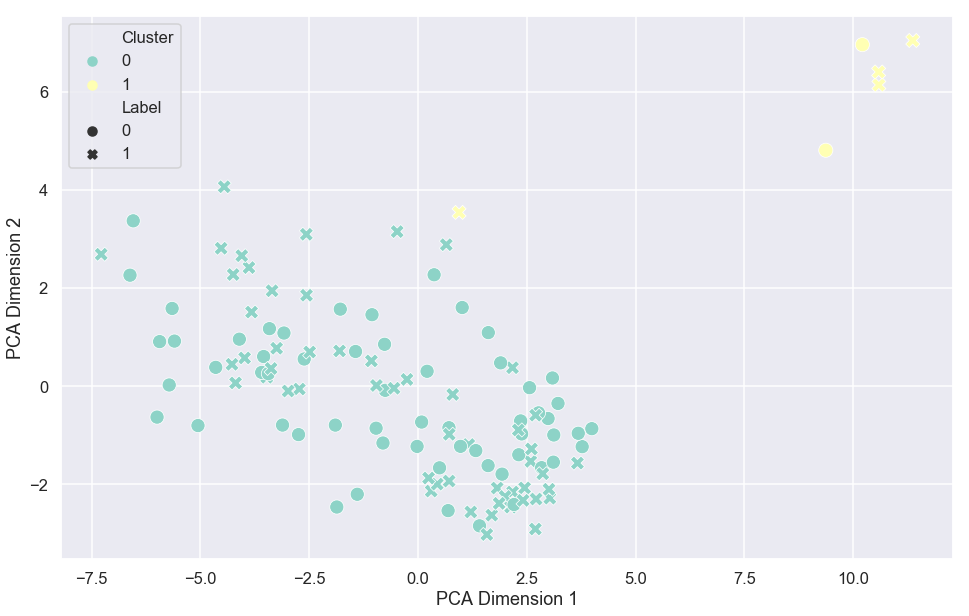

In [120]:
# visualize k means with pca 
from sklearn.decomposition import PCA

# pca 
pca = PCA(n_components=2)
pca_embedded = pca.fit_transform(X_s)
pca_df = pd.DataFrame(data = pca_embedded, 
        columns = ['PCA Dimension 1', 'PCA Dimension 2'])
print(pca.explained_variance_ratio_)

kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

pca_df['Cluster'] = kmeans.labels_
pca_df['Label'] = data['Fraud']

plt.figure(figsize=(16, 10))

sns.scatterplot(x="PCA Dimension 1", y="PCA Dimension 2",
                hue="Cluster", style="Label",
                data=pca_df, palette="Set3",s=200)

In [121]:
## Hiearchical Clustering 

In [122]:
import scipy 
from scipy.cluster.hierarchy import dendrogram, linkage 
from scipy.cluster.hierarchy import fcluster 
from scipy.cluster.hierarchy import cophenet 
from scipy.spatial.distance import pdist

from pylab import rcParams
import seaborn as sns 
import matplotlib.pyplot as plt 

import sklearn 
from sklearn.cluster import AgglomerativeClustering 
import sklearn.metrics as sm 


In [123]:
# generating hclusters 
k = 2 

affinities = ['euclidean', 'manhattan', 'cosine', "l1", "l2"]
linkages = ['ward', 'complete', 'average', 'single']

for a in affinities: 
    for l in linkages: 
        try:
            Hclustering = AgglomerativeClustering(n_clusters = k, affinity = a, linkage = l)
            Hclustering.fit(X_s)
            print("Accuracy for " + str(a) + " & " + str(l) + " is " + str(sm.accuracy_score(Y,Hclustering.labels_)))
        except: 
            pass
        

Accuracy for euclidean & ward is 0.48333333333333334
Accuracy for euclidean & complete is 0.5083333333333333
Accuracy for euclidean & average is 0.5083333333333333
Accuracy for euclidean & single is 0.5083333333333333
Accuracy for manhattan & complete is 0.5083333333333333
Accuracy for manhattan & average is 0.5083333333333333
Accuracy for manhattan & single is 0.5083333333333333
Accuracy for cosine & complete is 0.5
Accuracy for cosine & average is 0.5166666666666667
Accuracy for cosine & single is 0.5083333333333333
Accuracy for l1 & complete is 0.5083333333333333
Accuracy for l1 & average is 0.5083333333333333
Accuracy for l1 & single is 0.5083333333333333
Accuracy for l2 & complete is 0.5083333333333333
Accuracy for l2 & average is 0.5083333333333333
Accuracy for l2 & single is 0.5083333333333333


In [124]:
Hclustering = AgglomerativeClustering(n_clusters = 2, affinity = "cosine", linkage = "complete")
Hclustering.fit(X_s)
sum(Hclustering.labels_)

48

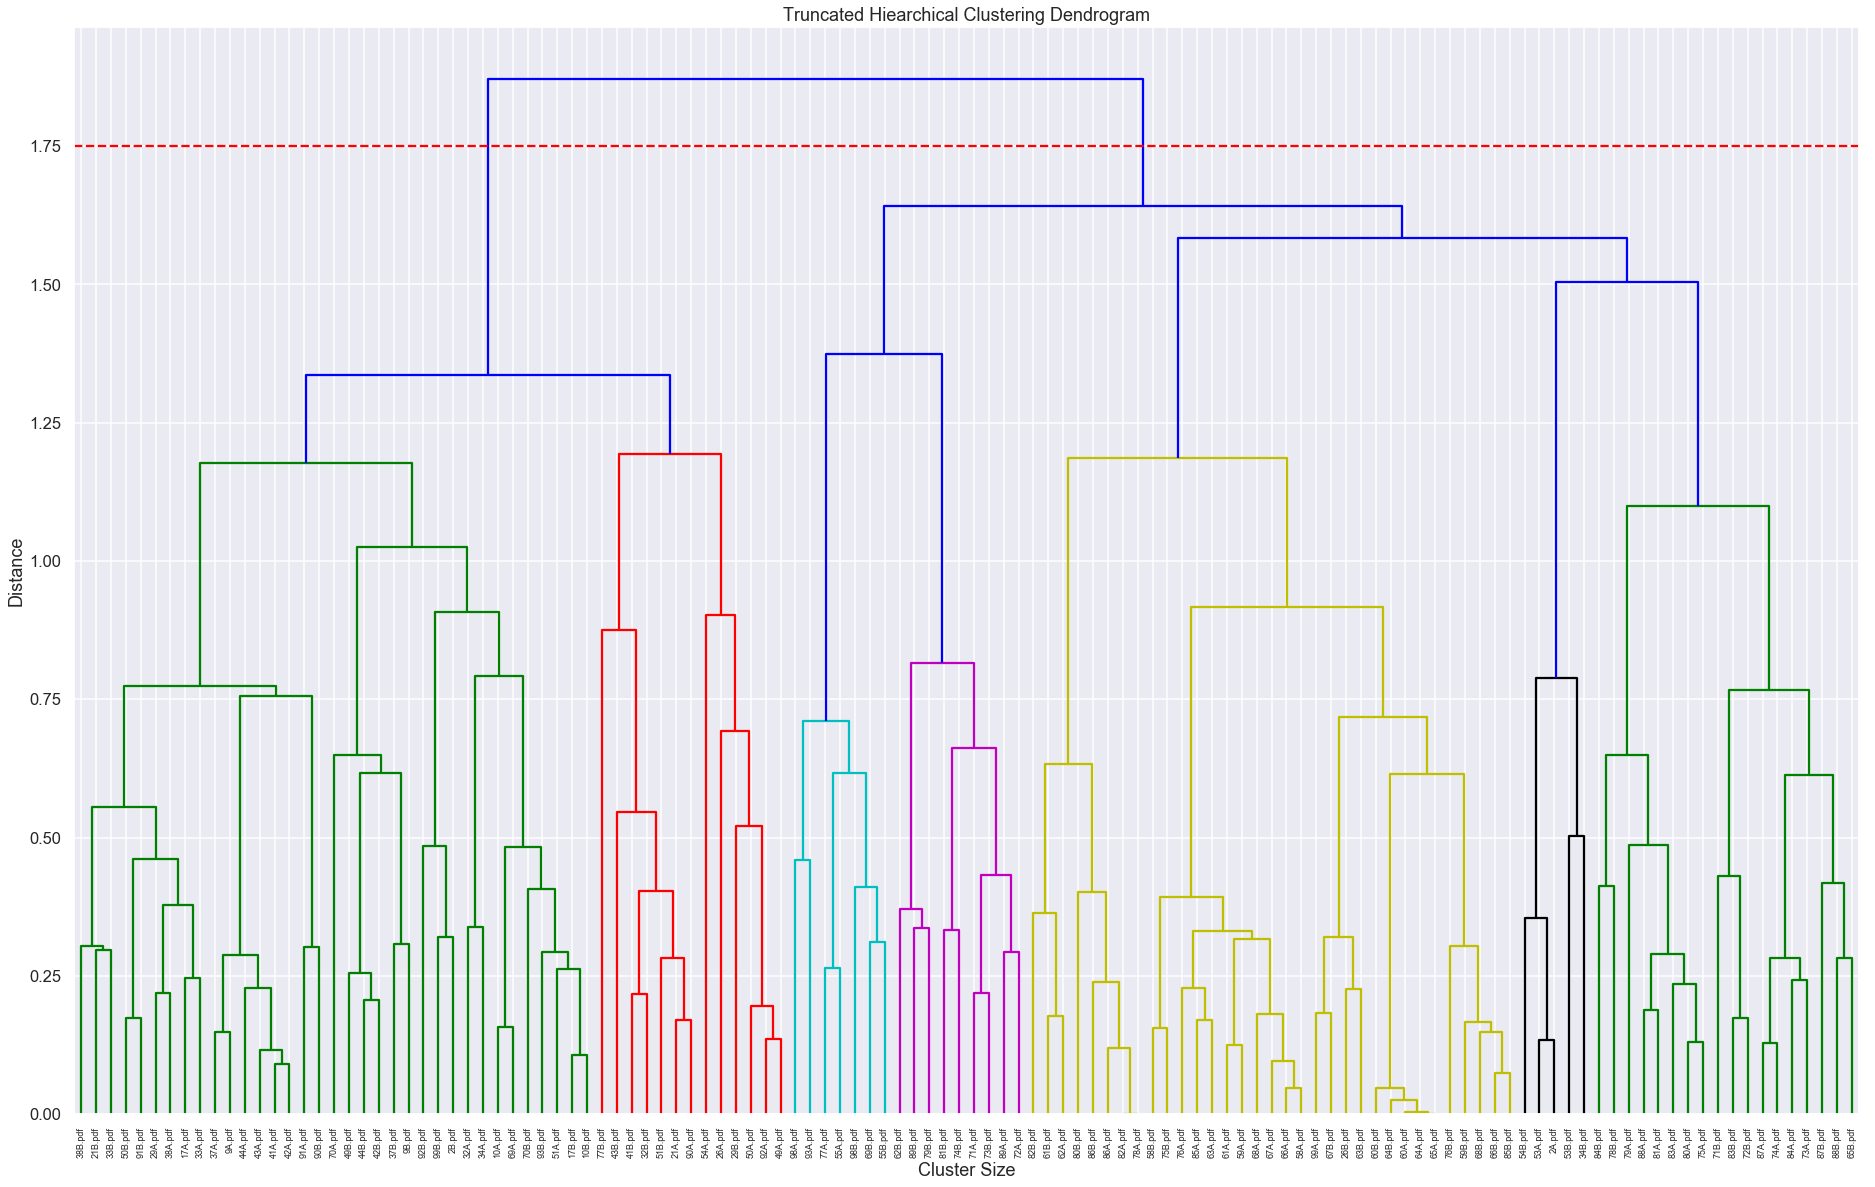

In [128]:
plt.figure(figsize=(32,20))

Z = linkage(X_s, method='complete', metric='cosine')
dendro = dendrogram(Z, leaf_font_size = 9., labels=X.index, get_leaves=True)
plt.title('Truncated Hiearchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=1.75, color='r', linestyle='--')
plt.show(dendro)


In [129]:
# quick test --> http://www.nxn.se/valent/extract-cluster-elements-by-color-in-python

In [130]:
from collections import defaultdict

import pandas as pd
from scipy.cluster.hierarchy import dendrogram, set_link_color_palette
#from fastcluster import linkage
import seaborn as sns
from matplotlib.colors import rgb2hex, colorConverter

In [131]:
class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = rgb2hex(colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'

        html += '</table>'

        return html

In [132]:
def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))

    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l

    return cluster_classes


In [133]:
get_cluster_classes(dendro)

y,"['61B.pdf', '62A.pdf', '82B.pdf', '82A.pdf', '78A.pdf', '86A.pdf', '86B.pdf', '80B.pdf', '58B.pdf', '75B.pdf', '85A.pdf', '63A.pdf', '76A.pdf', '61A.pdf', '59A.pdf', '66A.pdf', '58A.pdf', '67A.pdf', '68A.pdf', '99A.pdf', '67B.pdf', '26B.pdf', '63B.pdf', '64A.pdf', '65A.pdf', '60A.pdf', '64B.pdf', '60B.pdf', '66B.pdf', '85B.pdf', '68B.pdf', '59B.pdf', '76B.pdf']"
g,"['21B.pdf', '33B.pdf', '38B.pdf', '50B.pdf', '91B.pdf', '29A.pdf', '38A.pdf', '17A.pdf', '33A.pdf', '29A.pdf', '37A.pdf', '9A.pdf', '41A.pdf', '42A.pdf', '43A.pdf', '44A.pdf', '91A.pdf', '90B.pdf', '44B.pdf', '42B.pdf', '49B.pdf', '37B.pdf', '9B.pdf', '70A.pdf', '99B.pdf', '2B.pdf', '92B.pdf', '32A.pdf', '34A.pdf', '10A.pdf', '69A.pdf', '17B.pdf', '10B.pdf', '51A.pdf', '93B.pdf', '70B.pdf', '84B.pdf', '78B.pdf', '88A.pdf', '81A.pdf', '80A.pdf', '75A.pdf', '83A.pdf', '79A.pdf', '83B.pdf', '72B.pdf', '71B.pdf', '87A.pdf', '74A.pdf', '84A.pdf', '73A.pdf', '88B.pdf', '65B.pdf', '87B.pdf']"
m,"['89B.pdf', '79B.pdf', '62B.pdf', '81B.pdf', '74B.pdf', '71A.pdf', '73B.pdf', '89A.pdf', '72A.pdf', '71A.pdf']"
r,"['41B.pdf', '32B.pdf', '21A.pdf', '90A.pdf', '51B.pdf', '43B.pdf', '77B.pdf', '92A.pdf', '49A.pdf', '50A.pdf', '29B.pdf', '26A.pdf', '54A.pdf']"
k,"['53A.pdf', '2A.pdf', '54B.pdf', '53B.pdf', '34B.pdf']"
c,"['98A.pdf', '93A.pdf', '77A.pdf', '55A.pdf', '69B.pdf', '55B.pdf', '98B.pdf']"


In [134]:
print(dendro['leaves'])
print(dendro['ivl'])

[114, 13, 58, 30, 62, 52, 105, 7, 66, 1, 88, 59, 104, 18, 99, 54, 75, 35, 78, 67, 91, 8, 96, 38, 12, 72, 70, 115, 50, 82, 29, 34, 51, 0, 42, 14, 113, 23, 79, 43, 6, 84, 101, 36, 60, 24, 46, 69, 20, 28, 19, 102, 15, 73, 111, 97, 27, 118, 90, 94, 37, 85, 33, 61, 22, 16, 89, 116, 71, 80, 17, 95, 100, 110, 4, 25, 117, 21, 112, 57, 39, 32, 92, 5, 47, 44, 108, 10, 55, 3, 63, 74, 11, 103, 65, 26, 31, 93, 77, 81, 68, 106, 41, 87, 109, 40, 98, 9, 107, 119, 45, 2, 53, 56, 86, 49, 76, 64, 48, 83]
['38B.pdf', '21B.pdf', '33B.pdf', '50B.pdf', '91B.pdf', '29A.pdf', '38A.pdf', '17A.pdf', '33A.pdf', '37A.pdf', '9A.pdf', '44A.pdf', '43A.pdf', '41A.pdf', '42A.pdf', '91A.pdf', '90B.pdf', '70A.pdf', '49B.pdf', '44B.pdf', '42B.pdf', '37B.pdf', '9B.pdf', '92B.pdf', '99B.pdf', '2B.pdf', '32A.pdf', '34A.pdf', '10A.pdf', '69A.pdf', '70B.pdf', '93B.pdf', '51A.pdf', '17B.pdf', '10B.pdf', '77B.pdf', '43B.pdf', '41B.pdf', '32B.pdf', '51B.pdf', '21A.pdf', '90A.pdf', '54A.pdf', '26A.pdf', '29B.pdf', '50A.pdf', '92A.

In [135]:
Z.shape

(119, 4)

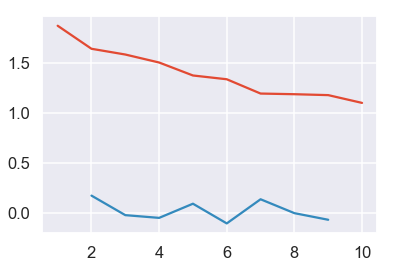

clusters: 2


In [136]:
last = Z[-10:, 2] # why these values
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

In [137]:
from scipy.cluster.hierarchy import leaves_list
print(leaves_list(Z))

[114  13  58  30  62  52 105   7  66   1  88  59 104  18  99  54  75  35
  78  67  91   8  96  38  12  72  70 115  50  82  29  34  51   0  42  14
 113  23  79  43   6  84 101  36  60  24  46  69  20  28  19 102  15  73
 111  97  27 118  90  94  37  85  33  61  22  16  89 116  71  80  17  95
 100 110   4  25 117  21 112  57  39  32  92   5  47  44 108  10  55   3
  63  74  11 103  65  26  31  93  77  81  68 106  41  87 109  40  98   9
 107 119  45   2  53  56  86  49  76  64  48  83]


In [138]:
X.index

Index(['17B.pdf', '37A.pdf', '83B.pdf', '60A.pdf', '76A.pdf', '99A.pdf',
       '21A.pdf', '17A.pdf', '37B.pdf', '83A.pdf',
       ...
       '75B.pdf', '55B.pdf', '59A.pdf', '43B.pdf', '38B.pdf', '34A.pdf',
       '80B.pdf', '63A.pdf', '79B.pdf', '75A.pdf'],
      dtype='object', name='File', length=120)

In [139]:
leaves_list(Z)[0]

114

In [140]:
Hclustering = AgglomerativeClustering(n_clusters = k, affinity = 'cosine', linkage = 'complete')
Hclustering.fit(X_s)
y_pred = Hclustering.labels_

In [141]:
Hclustering.n_leaves_

120

In [142]:
# make splits 

In [143]:
### 3.1) Leave one out Cross-Validation with case control design
import random

def cross_validation_cc(df, k=5, seed=42): 
    '''
    df: dataframe with file column names A and B for A being the case group and B being the control group 
    k: number of splits, number of cases must be divisible by k 
    returns list of list of cases
    '''
    if len(df) % k != 0:
        print("Choose a k that number of cases can be divided by ...")
        
    # get cases list 
    cases = [c for c in df.File if "A" in c]
    
    # set random seed
    random.seed(seed)
    
    # shuffle cases randomly 
    cases = random.sample(cases, len(cases))

    # match with control 
    control = [re.sub('A', 'B', c) for c in cases] 

    cc_lists = [] 
    number_per_split = len(df) / k # sum of case and control
    
    index = 0
    for split in range(1,k+1): 
        cc_lists.append( cases[index:int(index + (number_per_split/2))] + control[index:int(index + (number_per_split/2))])
        index = int(index + number_per_split/2)
    return(cc_lists)

def get_train_test(df, X, split):
    cross_val_filter = df.File.isin(split).values
    X_train = X[~cross_val_filter]
    X_test = X[cross_val_filter]
    Y_train = Y[~cross_val_filter]
    Y_test = Y[cross_val_filter]
    return X_train,Y_train,X_test,Y_test

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# logistic regression
parameters = {'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver': ['liblinear'],
              'max_iter' : [10000]
              }

LR = LogisticRegression()
clf_LR = GridSearchCV(LR, parameters, cv=5)
clf_LR.fit(X.reset_index().drop('File',axis=1),Y)
print(clf_LR.best_estimator_)
print(clf_LR.best_score_)



from sklearn import tree

# decision tree 
parameters = {'max_depth': np.arange(3, 10),
              'min_samples_split': np.arange(2, 10),
              }
DT = tree.DecisionTreeClassifier()
clf_DT = GridSearchCV(DT, parameters, cv=5)
clf_DT.fit(X.reset_index().drop('File',axis=1),Y)
print(clf_DT.best_estimator_)
print(clf_DT.best_score_)


from sklearn.ensemble import RandomForestClassifier

# random forest 
parameters = {'max_depth': np.arange(3, 10),
             'min_samples_leaf': [2, 5],
             'min_samples_split': [2, 5],
             'n_estimators': [10, 20, 50, 100]
              }

RF = RandomForestClassifier()
clf_RF = GridSearchCV(RF, parameters, cv=5)
clf_RF.fit(X.reset_index().drop('File',axis=1),Y)
print(clf_RF.best_estimator_)
print(clf_RF.best_score_)


in order to obtain a good estimate for the three models I will use the custom CV, save the results and repeat the procedure with multiple Random seeds

## Look at cross correlations in the data 

In [308]:
X_s_to_corr = X_s.copy()
X_s_to_corr['Fraud'] = Y.values

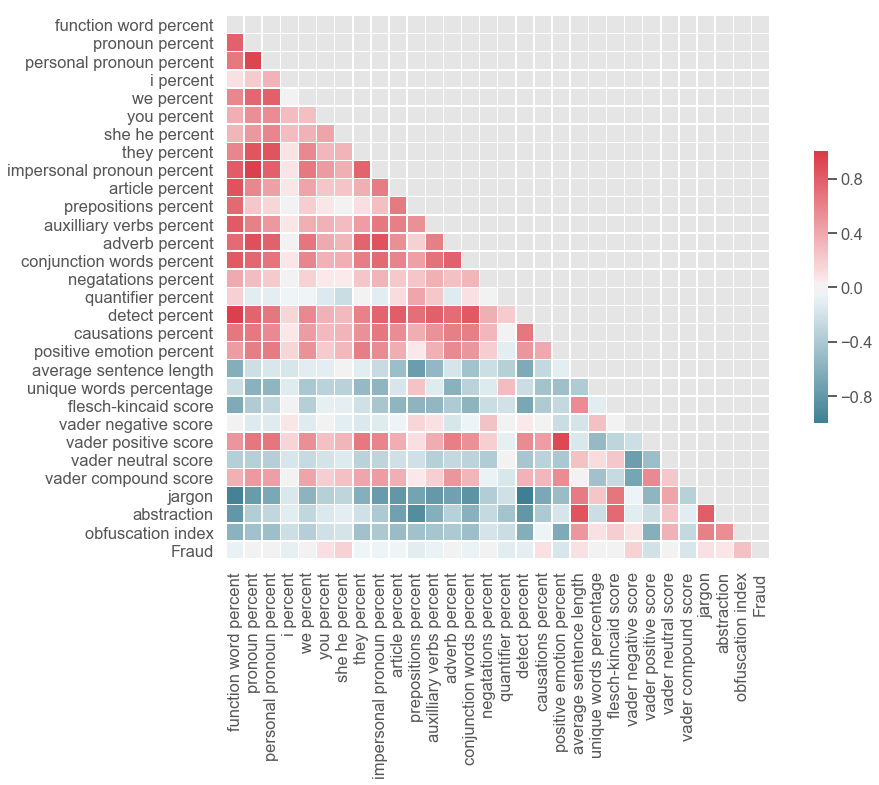

In [309]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = X_s_to_corr.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [310]:
corr = np.around(corr, decimals=3) 

In [311]:
corr.to_csv('correlation_matrix.csv')

In [312]:
from scipy.stats import pearsonr

sig_count = 0
non_sig_count = 0

summary = pd.DataFrame(columns = ['feature', 'correlation', 'p_value'])

for c in X_s.columns: 
    r_row, p_value = pearsonr(X_s_to_corr[c],  X_s_to_corr['Fraud'])    
    if float(p_value) < 0.05: 
        print("For " + str(c) + " p_value = " + str(p_value) + " IS sign.")
        sig_count += 1
        summary = summary.append({'feature':str(c),'p_value':str(round(p_value,3)), 'correlation':str(round(r_row,3))}, ignore_index = True) 

    else: 
        #print("For " + str(c) + " p_value = " + str(p_value) + " is NOT sign.")
        non_sig_count += 1
        summary = summary.append({'feature':str(c),'p_value':str(round(p_value,3)), 'correlation':str(round(r_row,3))}, ignore_index = True) 

print(summary)

For vader positive score p_value = 0.026725961899297563 IS sign.
For obfuscation index p_value = 0.0026714424872521696 IS sign.
                       feature correlation p_value
0        function word percent      -0.076   0.407
1              pronoun percent      -0.027   0.773
2     personal pronoun percent        0.01   0.918
3                    i percent      -0.082   0.372
4                   we percent       0.014   0.877
5                  you percent       0.109   0.236
6               she he percent       0.174   0.057
7                 they percent      -0.043   0.644
8   impersonal pronoun percent      -0.053   0.565
9              article percent      -0.041   0.655
10        prepositions percent      -0.116   0.208
11    auxilliary verbs percent      -0.065   0.479
12              adverb percent       0.017   0.856
13   conjunction words percent      -0.066   0.476
14         negatations percent       0.001   0.991
15          quantifier percent      -0.111   0.229
16   

### Function words only 

In [151]:
#Function words only 
X_s_fw = X_s[['function_Percent',
             'pronoun_Percent', 
             'ppron_Percent', 
             'i_Percent', 
             'we_Percent',
             'you_Percent', 
             'shehe_Percent', 
             'they_Percent', 
             'ipron_Percent',
             'article_Percent', 
             'prep_Percent', 
             'auxverb_Percent', 
             'adverb_Percent',
             'conj_Percent',
             'negate_Percent']]

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from tqdm import tqdm 

seeds = [1,2,3,4,5,6,7,8,9,10]

results = pd.DataFrame(columns = ['classifier', 'accuracy', 'sensitivity' , 'specificity', 'auc', 'split', 'seed'])


for seed in tqdm(seeds): 
    # record all the accuracies etc for this seed 
    seed_results = pd.DataFrame(columns = ['classifier', 'accuracy', 'sensitivity' , 'specificity', 'auc', 'split', 'seed'])
    
    # get a new split list 
    split_list = cross_validation_cc(data, 5,seed)
    
    for split in split_list:
        # get new train and test sets 
        (X_train,Y_train,X_test,Y_test) = get_train_test(data,X_s_fw, split)

        # initialize and fit each unsupervised classifier 
        kmeans_clf = KMeans(n_clusters=2, random_state=42).fit(X_test)
        Hclustering_clf = AgglomerativeClustering(n_clusters = 2, affinity = "cosine", linkage = "complete").fit(X_test)
        
        # initialize each supervised classifier 
        LR_clf = LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=10000,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

        DT_clf = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

        RF_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=42, verbose=0,
            warm_start=False)
        
        # fit on data 
        LR_clf.fit(X_train, Y_train)
        DT_clf.fit(X_train, Y_train)
        RF_clf.fit(X_train, Y_train)
        
        supervised_classifiers = [LR_clf,DT_clf,RF_clf]
        unsupervised_classifiers = [kmeans_clf, Hclustering_clf]
        
        for sclf in supervised_classifiers: 
            # evaluate the results 
            yhat = sclf.predict(X_test)
            acc = accuracy_score(Y_test, yhat) 
            tn, fp, fn, tp = confusion_matrix(Y_test, yhat).ravel()
            fpr, tpr, thresholds = metrics.roc_curve(Y_test, yhat, pos_label=1)
            sens = (tp/(tp +fn))
            spec = (tn/(tn+ fp))
            auc = metrics.auc(fpr, tpr)
        
            # save results in dictionary
            seed_dict = {'classifier': str(sclf),
                         'accuracy':acc, 
                         'sensitivity': sens, 
                         'specificity': spec, 
                         'auc': auc,
                         'split': split, 
                         'seed': seed
            
            }
        
            # append dictionary to dataframe 
            seed_results = seed_results.append(seed_dict, ignore_index = True)
        
        for uclf in unsupervised_classifiers: 
            # evaluate the results 
            yhat = uclf.labels_
            acc = accuracy_score(Y_test, yhat) 
            tn, fp, fn, tp = confusion_matrix(Y_test, yhat).ravel()
            fpr, tpr, thresholds = metrics.roc_curve(Y_test, yhat, pos_label=1)
            sens = (tp/(tp +fn))
            spec = (tn/(tn+ fp))
            auc = metrics.auc(fpr, tpr)
        
            # save results in dictionary
            seed_dict = {'classifier': str(uclf),
                         'accuracy':acc, 
                         'sensitivity': sens, 
                         'specificity': spec, 
                         'auc': auc,
                         'split': split, 
                         'seed': seed
            
            }
        
            # append dictionary to dataframe 
            seed_results = seed_results.append(seed_dict, ignore_index = True)
    
# append to seed results to final results 
results = results.append(seed_results, ignore_index = True)   
    
aggregation = {
    'accuracy' : {'mean', 'std'},
    'sensitivity': {'mean', 'std'},
    'specificity': {'mean', 'std'},
    'auc' : {'mean', 'std'}
}

results_aggregated = results.groupby('classifier',as_index=False).agg(aggregation)
conversion_dict = {
                   "AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',\n            connectivity=None, linkage='complete', memory=None,\n            n_clusters=2, pooling_func='deprecated')": "Agglomerative Clustering", 
                   "DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,\n            max_features=None, max_leaf_nodes=None,\n            min_impurity_decrease=0.0, min_impurity_split=None,\n            min_samples_leaf=1, min_samples_split=2,\n            min_weight_fraction_leaf=0.0, presort=False, random_state=None,\n            splitter='best')": "Decision Tree", 
                   "KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,\n    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',\n    random_state=42, tol=0.0001, verbose=0)":"K-Means", 
                   "LogisticRegression(C=10000.0, class_weight=None, dual=False,\n          fit_intercept=True, intercept_scaling=1, max_iter=10000,\n          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,\n          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)": "Logistic Regression", 
                   "RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n            max_depth=4, max_features='auto', max_leaf_nodes=None,\n            min_impurity_decrease=0.0, min_impurity_split=None,\n            min_samples_leaf=2, min_samples_split=10,\n            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,\n            oob_score=False, random_state=None, verbose=0,\n            warm_start=False)": "Random Forest"
                  }
results_aggregated['classifier'] = results_aggregated['classifier'].replace(conversion_dict)
results_aggregated  

100%|██████████| 10/10 [03:41<00:00, 21.46s/it]


classifier sensitivity            \
                                                            mean       std   
0                           Agglomerative Clustering    0.400000  0.136931   
1  DecisionTreeClassifier(class_weight=None, crit...    0.533333  0.162447   
2                                            K-Means    0.466667  0.325960   
3  LogisticRegression(C=10000.0, class_weight=Non...    0.566667  0.207498   
4  RandomForestClassifier(bootstrap=True, class_w...    0.683333  0.123603   

   accuracy           specificity                 auc            
       mean       std        mean       std      mean       std  
0  0.508333  0.034861    0.616667  0.111803  0.508333  0.034861  
1  0.541667  0.128425    0.550000  0.217307  0.541667  0.128425  
2  0.491667  0.018634    0.516667  0.296975  0.491667  0.018634  
3  0.541667  0.097717    0.516667  0.123603  0.541667  0.097717  
4  0.666667  0.083333    0.650000  0.108653  0.666667  0.083333

In [154]:
X_s.columns

Index(['function_Percent', 'pronoun_Percent', 'ppron_Percent', 'i_Percent',
       'we_Percent', 'you_Percent', 'shehe_Percent', 'they_Percent',
       'ipron_Percent', 'article_Percent', 'prep_Percent', 'auxverb_Percent',
       'adverb_Percent', 'conj_Percent', 'negate_Percent', 'quant_Percent',
       'Detect_Percent', 'cause_Percent', 'posemo_Percent', 'avg_sent',
       'unique_word_perc', 'flesch_kincaid', 'vader_negative',
       'vader_positive', 'vader_neutral', 'vader_compound', 'jargon',
       'abstraction', 'obfuscation_index'],
      dtype='object')

### All features 


In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

seeds = [1,2,3,4,5,6,7,8,9,10]

results = pd.DataFrame(columns = ['classifier', 'accuracy', 'sensitivity' , 'specificity', 'auc', 'split', 'seed'])


for seed in tqdm(seeds): 
    # record all the accuracies etc for this seed 
    seed_results = pd.DataFrame(columns = ['classifier', 'accuracy', 'sensitivity' , 'specificity', 'auc', 'split', 'seed'])
    
    # get a new split list 
    split_list = cross_validation_cc(data, 5,seed)
    
    for split in split_list:
        # get new train and test sets 
        (X_train,Y_train,X_test,Y_test) = get_train_test(data,X_s, split)
        
        # initialize and fit each unsupervised classifier 
        kmeans_clf = KMeans(n_clusters=2, random_state=42).fit(X_test)
        Hclustering_clf = AgglomerativeClustering(n_clusters = 2, affinity = "cosine", linkage = "complete").fit(X_test)
        
        # initialize each supervised classifier 
        LR_clf = LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=10000,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

        DT_clf = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

        RF_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=42, verbose=0,
            warm_start=False)
        
        # fit on data 
        LR_clf.fit(X_train, Y_train)
        DT_clf.fit(X_train, Y_train)
        RF_clf.fit(X_train, Y_train)
        
        supervised_classifiers = [LR_clf,DT_clf,RF_clf]
        unsupervised_classifiers = [kmeans_clf, Hclustering_clf]
        
        for sclf in supervised_classifiers: 
            # evaluate the results 
            yhat = sclf.predict(X_test)
            acc = accuracy_score(Y_test, yhat) 
            tn, fp, fn, tp = confusion_matrix(Y_test, yhat).ravel()
            fpr, tpr, thresholds = metrics.roc_curve(Y_test, yhat, pos_label=1)
            sens = (tp/(tp +fn))
            spec = (tn/(tn+ fp))
            auc = metrics.auc(fpr, tpr)
        
            # save results in dictionary
            seed_dict = {'classifier': str(sclf),
                         'accuracy':acc, 
                         'sensitivity': sens, 
                         'specificity': spec, 
                         'auc': auc,
                         'split': split, 
                         'seed': seed
            
            }
        
            # append dictionary to dataframe 
            seed_results = seed_results.append(seed_dict, ignore_index = True)
        
        for uclf in unsupervised_classifiers: 
            # evaluate the results 
            yhat = uclf.labels_
            acc = accuracy_score(Y_test, yhat) 
            tn, fp, fn, tp = confusion_matrix(Y_test, yhat).ravel()
            fpr, tpr, thresholds = metrics.roc_curve(Y_test, yhat, pos_label=1)
            sens = (tp/(tp +fn))
            spec = (tn/(tn+ fp))
            auc = metrics.auc(fpr, tpr)
        
            # save results in dictionary
            seed_dict = {'classifier': str(uclf),
                         'accuracy':acc, 
                         'sensitivity': sens, 
                         'specificity': spec, 
                         'auc': auc,
                         'split': split, 
                         'seed': seed
            
            }
        
            # append dictionary to dataframe 
            seed_results = seed_results.append(seed_dict, ignore_index = True)
    
# append to seed results to final results 
results = results.append(seed_results, ignore_index = True)   
    
aggregation = {
    'accuracy' : {'mean', 'std'},
    'sensitivity': {'mean', 'std'},
    'specificity': {'mean', 'std'},
    'auc' : {'mean', 'std'}
}

results_aggregated = results.groupby('classifier',as_index=False).agg(aggregation)
conversion_dict = {
                   "AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',\n            connectivity=None, linkage='complete', memory=None,\n            n_clusters=2, pooling_func='deprecated')": "Agglomerative Clustering", 
                   "DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,\n            max_features=None, max_leaf_nodes=None,\n            min_impurity_decrease=0.0, min_impurity_split=None,\n            min_samples_leaf=1, min_samples_split=2,\n            min_weight_fraction_leaf=0.0, presort=False, random_state=None,\n            splitter='best')": "Decision Tree", 
                   "KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,\n    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',\n    random_state=42, tol=0.0001, verbose=0)":"K-Means", 
                   "LogisticRegression(C=10000.0, class_weight=None, dual=False,\n          fit_intercept=True, intercept_scaling=1, max_iter=10000,\n          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,\n          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)": "Logistic Regression", 
                   "RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n            max_depth=4, max_features='auto', max_leaf_nodes=None,\n            min_impurity_decrease=0.0, min_impurity_split=None,\n            min_samples_leaf=2, min_samples_split=10,\n            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,\n            oob_score=False, random_state=None, verbose=0,\n            warm_start=False)": "Random Forest"
                  }
results_aggregated['classifier'] = results_aggregated['classifier'].replace(conversion_dict)
results_aggregated  

100%|██████████| 10/10 [02:26<00:00, 14.85s/it]


classifier sensitivity            \
                                                            mean       std   
0                           Agglomerative Clustering    0.550000  0.126381   
1  DecisionTreeClassifier(class_weight=None, crit...    0.616667  0.162447   
2                                            K-Means    0.450000  0.303910   
3  LogisticRegression(C=10000.0, class_weight=Non...    0.600000  0.215703   
4  RandomForestClassifier(bootstrap=True, class_w...    0.800000  0.139443   

   accuracy           specificity                 auc            
       mean       std        mean       std      mean       std  
0  0.558333  0.047507    0.566667  0.108653  0.558333  0.047507  
1  0.633333  0.034861    0.650000  0.180662  0.633333  0.034861  
2  0.491667  0.045644    0.533333  0.303910  0.491667  0.045644  
3  0.625000  0.106230    0.650000  0.149071  0.625000  0.106230  
4  0.741667  0.068465    0.683333  0.091287  0.741667  0.068465

In [156]:
results.head()

,classifier,accuracy,sensitivity,specificity,auc,split,seed
0,"LogisticRegression(C=10000.0, class_weight=Non...",0.625000,0.833333,0.416667,0.625000,"[65A.pdf, 76A.pdf, 91A.pdf, 44A.pdf, 75A.pdf, ...",10
1,"DecisionTreeClassifier(class_weight=None, crit...",0.625000,0.500000,0.750000,0.625000,"[65A.pdf, 76A.pdf, 91A.pdf, 44A.pdf, 75A.pdf, ...",10
2,"RandomForestClassifier(bootstrap=True, class_w...",0.750000,0.833333,0.666667,0.750000,"[65A.pdf, 76A.pdf, 91A.pdf, 44A.pdf, 75A.pdf, ...",10
3,"KMeans(algorithm='auto', copy_x=True, init='k-...",0.541667,0.416667,0.666667,0.541667,"[65A.pdf, 76A.pdf, 91A.pdf, 44A.pdf, 75A.pdf, ...",10
4,"AgglomerativeClustering(affinity='cosine', com...",0.541667,0.583333,0.500000,0.541667,"[65A.pdf, 76A.pdf, 91A.pdf, 44A.pdf, 75A.pdf, ...",10


In [157]:
# run some garbage collection to free some ram 
import gc 
gc.collect()

20395

### Estimate the effect of additional data on model 

In [158]:
def drop_cases(df,n_drop, seed=42): 
    # get cases list 
    cases = [c for c in df.File if "A" in c]
    
    # set random seed
    random.seed(seed)
    
    # shuffle cases randomly 
    cases = random.sample(cases, len(cases) - n_drop)

    # match with control 
    control = [re.sub('A', 'B', c) for c in cases] 
    
    # create new dataset based on cases and control list 
    df_filter = ~df.File.isin(cases + control)
    new_df = df[~df_filter]
    return new_df

In [159]:
# 80/20 split in case control design 
def get_8020_split(df, seed): 
    # get cases list 
    cases = [c for c in df.File if "A" in c]
    
    # set random seed
    random.seed(seed)
    
    # shuffle cases randomly 
    cases = random.sample(cases, len(cases))
    
    # match with control 
    control = [re.sub('A', 'B', c) for c in cases] 
    train_list = [] 
    number_train = int((len(df) * 0.8)/2)  # number for train 
    number_test = len(df) - number_train  # number for train 
    train_list.append(cases[0:number_train] + control[0:number_train])
    
    return(train_list)

def get_train_test(df, X, split):
    mask = df.File.isin(split).values
    X_train = X[mask]
    X_test = X[~mask]
    Y_train = Y[mask]
    Y_test = Y[~mask]
    return X_train,Y_train,X_test,Y_test

In [160]:
data.head()

,File,Fraud,function_Percent,pronoun_Percent,ppron_Percent,i_Percent,we_Percent,you_Percent,shehe_Percent,they_Percent,...,avg_sent,unique_word_perc,flesch_kincaid,vader_negative,vader_positive,vader_neutral,vader_compound,jargon,abstraction,obfuscation_index
0,17B.pdf,0,0.367920,0.053640,0.023506,0.002175,0.012012,0.001036,0.000828,0.007456,...,17.490842,0.189529,0.5392,0.105,0.137,0.758,0.9998,-1.305017,-0.496078,-3.289486
1,37A.pdf,1,0.349375,0.051566,0.021223,0.002868,0.009177,0.002008,0.003155,0.004015,...,21.847909,0.133136,0.5913,0.046,0.086,0.868,1.0000,-0.630976,-0.118066,0.904052
2,83B.pdf,0,0.278591,0.027769,0.010152,0.001493,0.006271,0.000000,0.000299,0.002090,...,16.428571,0.358621,0.5371,0.120,0.047,0.833,-0.9998,0.344984,0.090134,1.635087
3,60A.pdf,1,0.086983,0.005981,0.001622,0.000608,0.000811,0.000203,0.000000,0.000000,...,51.915344,0.150428,1.0999,0.039,0.025,0.936,-0.9983,3.661586,5.160413,4.424636
4,76A.pdf,1,0.280119,0.017018,0.006213,0.000540,0.002431,0.000270,0.000270,0.002701,...,18.984375,0.335802,0.5300,0.109,0.057,0.834,-0.9996,0.269507,-0.204374,0.952007


In [161]:
%%time
# estimating the effect of more data for the random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import random
from tqdm import tqdm
seeds = [1,2,3,4,5]
results_n = pd.DataFrame(columns = ['classifier', 'accuracy', 'sensitivity' , 'specificity', 'auc', 'split', 'seed', 'n'])


for i in tqdm(range(1,59)): 
    # new dataframe with smaller n 
    new_data = drop_cases(data, i, seed = 42)
    X = new_data.drop(['Fraud','File'], axis=1).set_index(new_data.File)
    Y = new_data['Fraud']
    for seed in seeds: 
        # record all the accuracies etc for this seed 
        seed_results = pd.DataFrame(columns = ['classifier', 'accuracy', 'sensitivity' , 'specificity', 'auc', 'split', 'seed','n'])
    
        # get a new split list 
        split_list = get_8020_split(new_data, seed) 
        
        for split in split_list:
            # get new train and test sets 
            (X_train,Y_train,X_test,Y_test) = get_train_test(new_data, X, split)
            
            LR_clf = LogisticRegression(C=10000.0, class_weight=None, dual=False,
                fit_intercept=True, intercept_scaling=1, max_iter=10000,
                multi_class='warn', n_jobs=None, penalty='l1', random_state=42,
                solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

            RF_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                max_depth=4, max_features='auto', max_leaf_nodes=None,
                min_impurity_decrease=0.0, min_impurity_split=None,
                min_samples_leaf=2, min_samples_split=10,
                min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
                oob_score=False, random_state=42, verbose=0,
                warm_start=False)
            
            DT_clf = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                max_features=None, max_leaf_nodes=None,
                min_impurity_decrease=0.0, min_impurity_split=None,
                min_samples_leaf=1, min_samples_split=2,
                min_weight_fraction_leaf=0.0, presort=False, random_state=42,
                splitter='best')
        
            # fit on data 
            LR_clf.fit(X_train, Y_train)
            DT_clf.fit(X_train, Y_train)
            RF_clf.fit(X_train, Y_train)
        
            supervised_classifiers = [LR_clf,DT_clf,RF_clf]

            for sclf in supervised_classifiers: 
                # evaluate the results 
                yhat = sclf.predict(X_test)
                acc = accuracy_score(Y_test, yhat) 
                tn, fp, fn, tp = confusion_matrix(Y_test, yhat).ravel()
                fpr, tpr, thresholds = metrics.roc_curve(Y_test, yhat, pos_label=1)
                sens = 1 - (tp/(tn+ fp+ fn+ tp))
                spec = 1 - (tn/(tn+ fp+ fn+ tp))
                auc = metrics.auc(fpr, tpr)
        
                # save results in dictionary
                seed_dict = {'classifier': str(sclf),
                         'accuracy':acc, 
                         'sensitivity': sens, 
                         'specificity': spec, 
                         'auc': auc,
                         'split': split, 
                         'seed': seed,
                         'n' : len(new_data)
                }
        
                # append dictionary to dataframe 
                seed_results = seed_results.append(seed_dict, ignore_index = True)

        # append to seed results to final results 
        results_n = results_n.append(seed_results, ignore_index = True) 
    


100%|██████████| 58/58 [04:02<00:00,  3.88it/s]

CPU times: user 3min 48s, sys: 1.43 s, total: 3min 49s
Wall time: 4min 2s


In [162]:
results_n['classifier'][0]

"LogisticRegression(C=10000.0, class_weight=None, dual=False,\n          fit_intercept=True, intercept_scaling=1, max_iter=10000,\n          multi_class='warn', n_jobs=None, penalty='l1', random_state=42,\n          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)"

In [163]:
results_n = results_n[['classifier', 'accuracy','n']]
conversion_dict = {
                   "DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,\n            max_features=None, max_leaf_nodes=None,\n            min_impurity_decrease=0.0, min_impurity_split=None,\n            min_samples_leaf=1, min_samples_split=2,\n            min_weight_fraction_leaf=0.0, presort=False, random_state=42,\n            splitter='best')": "Decision Tree", 
                   "LogisticRegression(C=10000.0, class_weight=None, dual=False,\n          fit_intercept=True, intercept_scaling=1, max_iter=10000,\n          multi_class='warn', n_jobs=None, penalty='l1', random_state=42,\n          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)": "Logistic Regression", 
                   "RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n            max_depth=4, max_features='auto', max_leaf_nodes=None,\n            min_impurity_decrease=0.0, min_impurity_split=None,\n            min_samples_leaf=2, min_samples_split=10,\n            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,\n            oob_score=False, random_state=42, verbose=0, warm_start=False)": "Random Forest"
                  }
results_n['classifier'] = results_n['classifier'].replace(conversion_dict)

/Users/lukasmalik/anaconda3/envs/myenv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


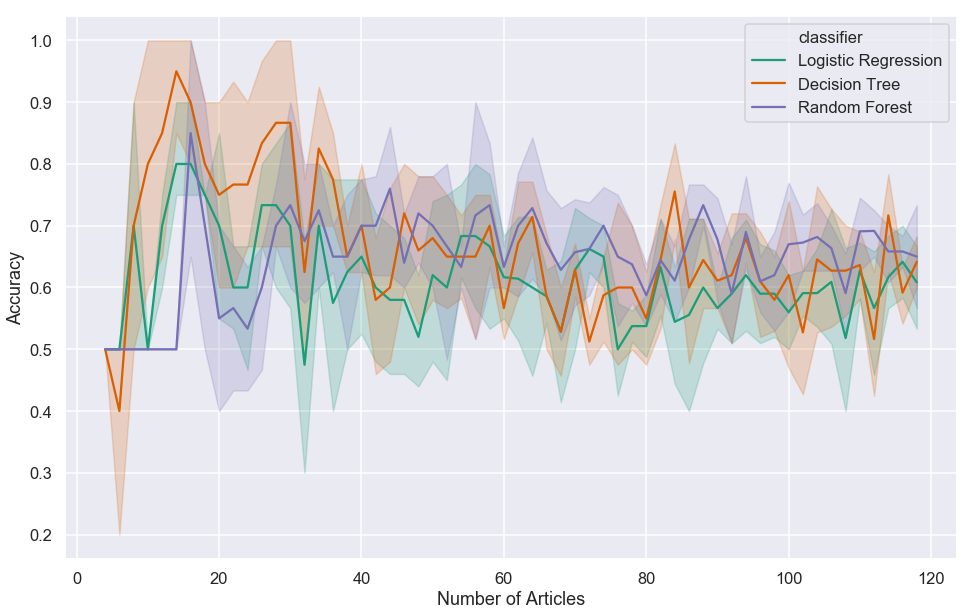

In [164]:
plt.figure(figsize=(16, 10))

fig = sns.lineplot(x= "n", y="accuracy", hue="classifier", data=results_n, markers=True,  palette = "Dark2")
fig.set(xlabel='Number of Articles', ylabel='Accuracy')
plt.show(fig)

## About Interpretability 

In [313]:
X = data.drop(['Fraud','File'], axis=1).set_index(data.File)
Y = data['Fraud']

In [314]:
X = X.loc[:,~X.columns.duplicated()]

In [315]:
# fit the models on the whole dataset 
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


#using the parameters from before 

LR_clf = LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=10000,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

DT_clf = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

RF_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=True, random_state=42, verbose=0,
            warm_start=False)

LR_clf.fit(X, Y)
DT_clf.fit(X, Y)
RF_clf.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

### Logistic Regression 

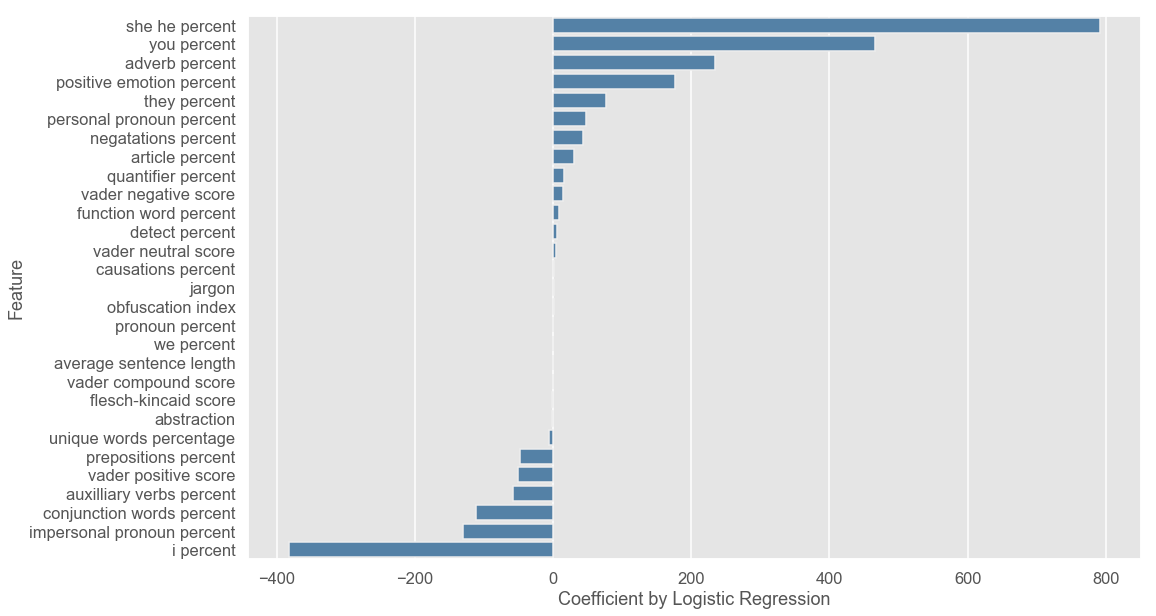

In [316]:
# coefficients of logistic regression 
coeff_df = pd.DataFrame(LR_clf.coef_[0], X.columns, columns=['Coefficient']).reset_index()

coeff_df  = coeff_df .sort_values(by=['Coefficient'], ascending=False)

style.use('ggplot')
sns.set_context('talk')

# make a barplot 
plt.figure(figsize=(16, 10))
fig = sns.barplot(x = "Coefficient", y= "index", data=coeff_df, color = "steelblue")
fig.set(xlabel='Coefficient by Logistic Regression', ylabel='Feature')
plt.show(fig)

### Decision tree 

In [317]:
# Visualize tree
from sklearn.tree import export_graphviz
import graphviz

dot_data = tree.export_graphviz(DT_clf,feature_names=X.columns, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Decision Tree")

'Decision Tree.pdf'

In [318]:
graph.format = 'png'
graph.render('dtree_render',view=True)

'dtree_render.png'

In [319]:
DT_clf.classes_

array([0, 1])

### Random Forest

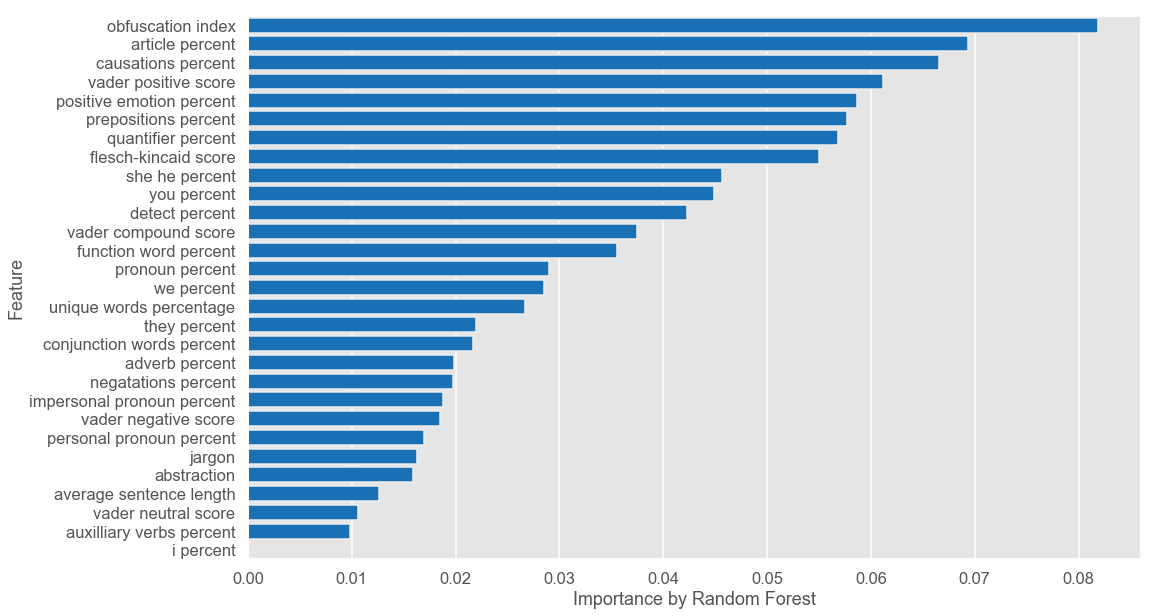

In [320]:
# get feature importance 
rf_importance = pd.DataFrame({'Feature': X.columns,
                              'Importance': RF_clf.feature_importances_,
                              'STD-Error':np.std([tree.feature_importances_ for tree in RF_clf.estimators_], axis=0)
                             })
rf_importance = rf_importance.sort_values(by=['Importance'], ascending=False)
# Plot the feature importances of the forest
style.use('ggplot')
sns.set_context('talk')

# make a barplot 
plt.figure(figsize=(16, 10))
fig = sns.barplot(x = "Importance", y= "Feature",  data=rf_importance, color = "#0073cf", ci = False)
fig.set(xlabel='Importance by Random Forest', ylabel='Feature')
plt.show(fig)

In [321]:
rf_importance

,Feature,Importance,STD-Error
28,obfuscation index,0.081899,0.111262
9,article percent,0.069317,0.117852
17,causations percent,0.066566,0.106985
23,vader positive score,0.061204,0.113464
18,positive emotion percent,0.058651,0.096991
10,prepositions percent,0.057736,0.085755
15,quantifier percent,0.056867,0.099100
21,flesch-kincaid score,0.054992,0.080462
6,she he percent,0.045663,0.104158
5,you percent,0.044898,0.081075


## Shap 

In [322]:
## HOW TO INTERPRET THE RESULTS USING SHAP 
import shap

# load JS visualization code to notebook
shap.initjs()

In [323]:
# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(RF_clf)
shap_values = explainer.shap_values(X_s)
expected_value = explainer.expected_value
shap_interaction_values = shap.TreeExplainer(RF_clf).shap_interaction_values(X_s)

In [324]:
len(shap_values[0])

120

In [325]:
predictions = pd.DataFrame({'y' : Y.values,
                            'yhat' : RF_clf.predict(X_s),  
                            'yproba' : RF_clf.predict_proba(X_s)[:,1]
                            }, index = X.index,)

In [326]:
predictions.loc['2A.pdf']

y         1.000000
yhat      0.000000
yproba    0.391384
Name: 2A.pdf, dtype: float64

In [327]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value[1], explainer.shap_values(X.loc['2A.pdf'])[1], X.loc['2A.pdf'] , show=True)


In [183]:
# local interpretation
shap.force_plot(explainer.expected_value[1], shap_values[1], X) 

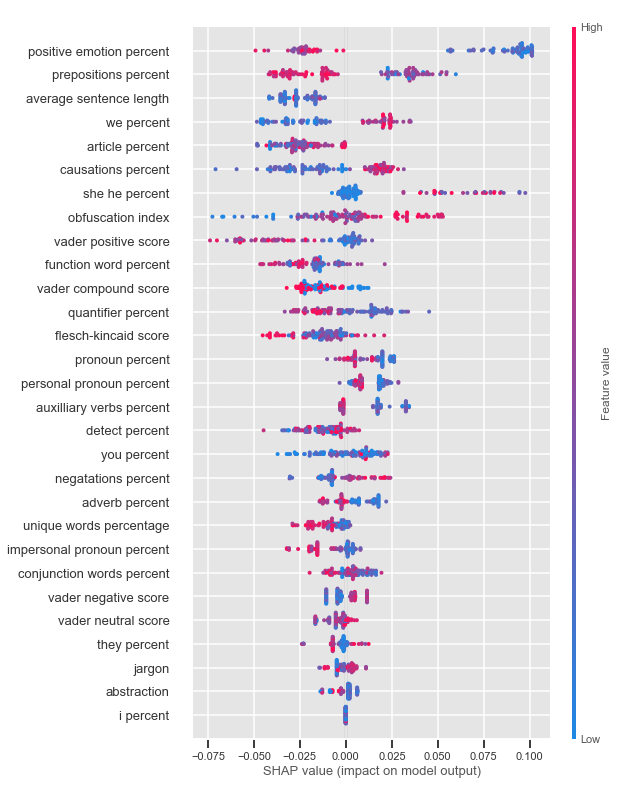

In [328]:
plt.figure(figsize=(16, 10))
shap.summary_plot(shap_values[1], X_s, max_display=29)


<Figure size 1152x720 with 0 Axes>

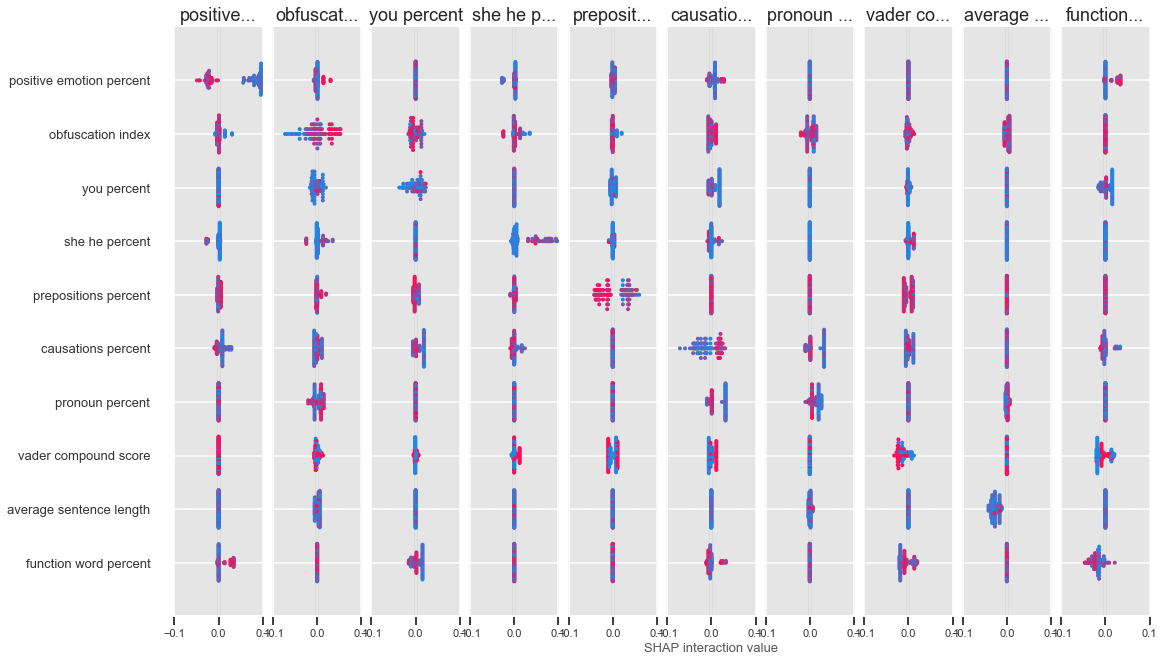

In [329]:
plt.figure(figsize=(16, 10))
shap.summary_plot(shap_interaction_values[1], X_s, max_display=10, plot_type="compact_dot")

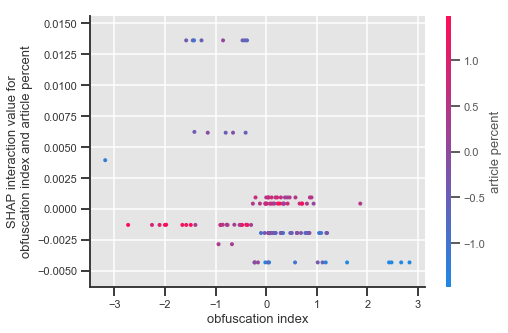

None


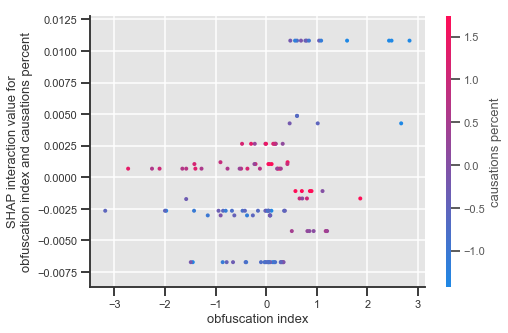

None


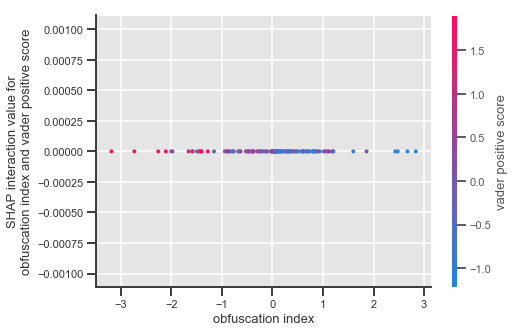

None


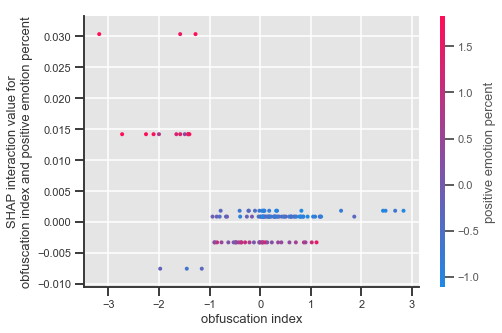

None


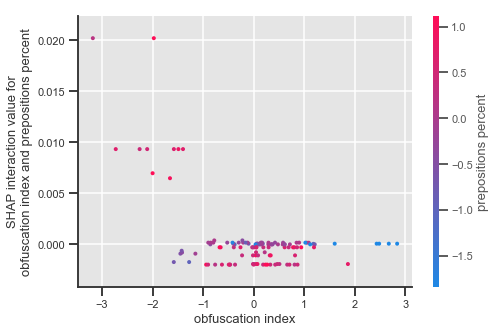

None


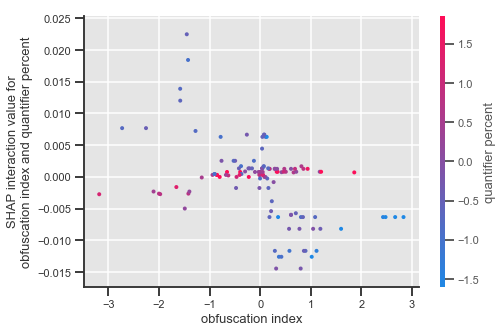

None


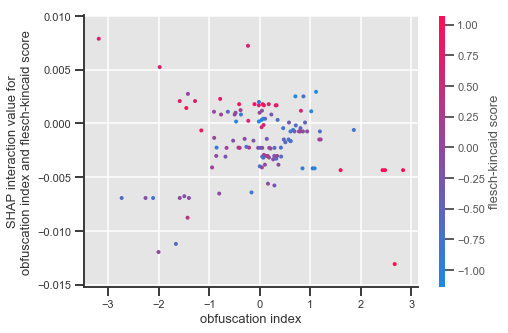

None


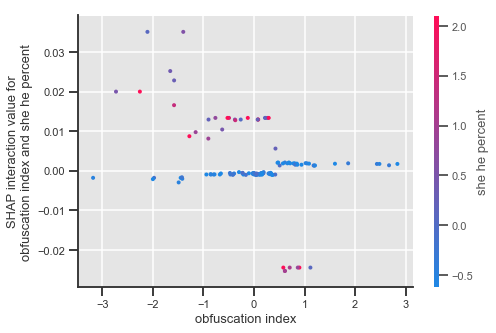

None


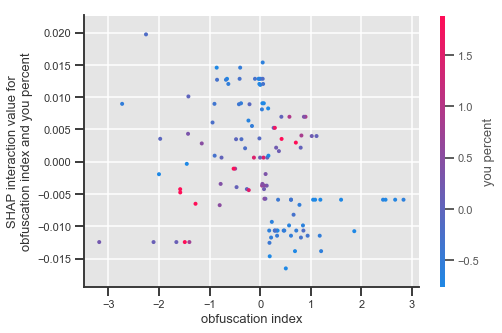

None


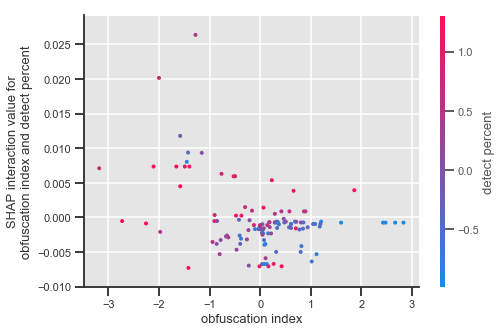

None


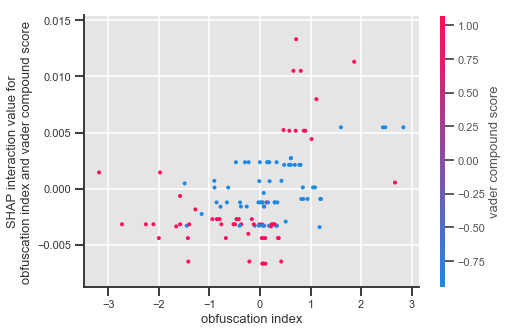

None


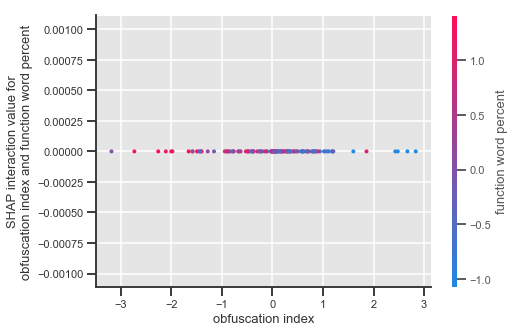

None


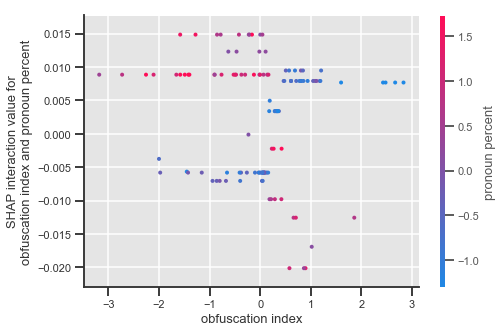

None


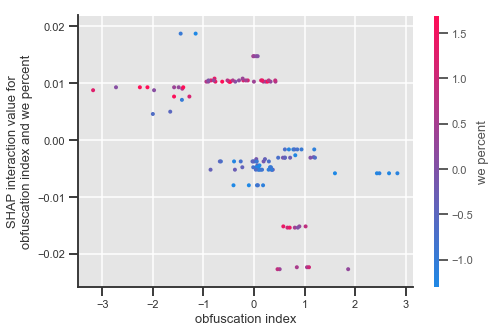

None


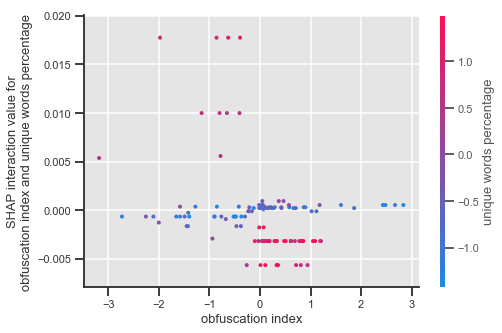

None


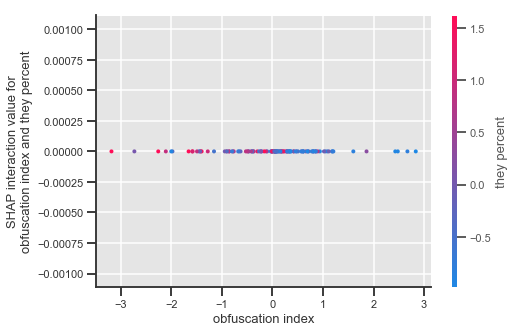

None


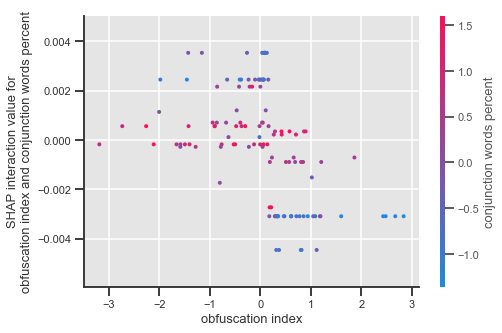

None


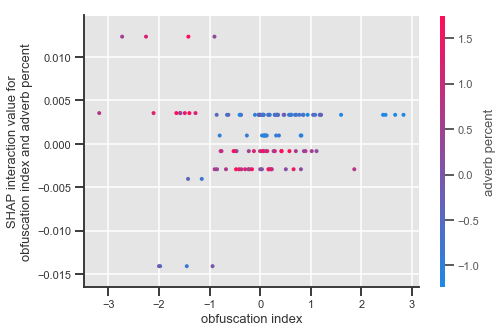

None


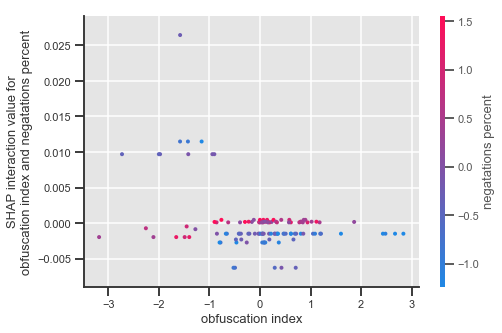

None


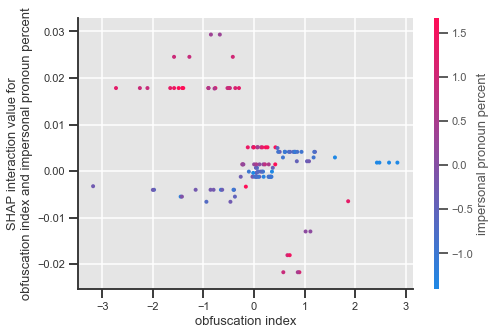

None


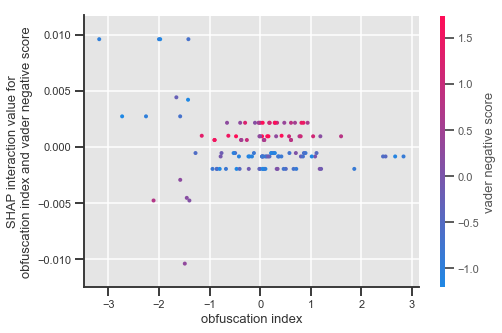

None


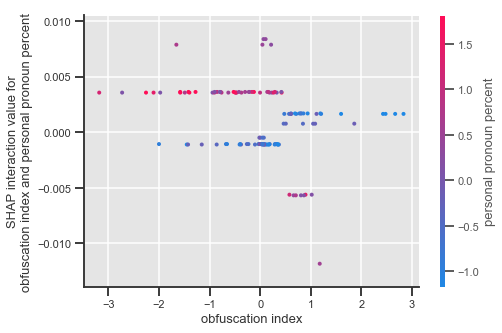

None


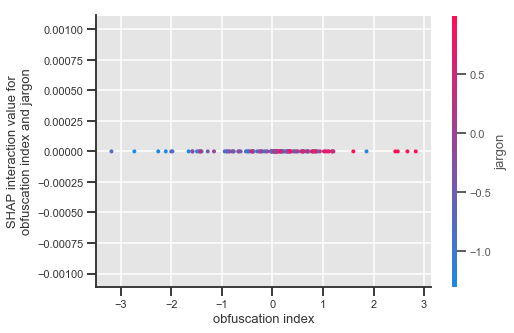

None


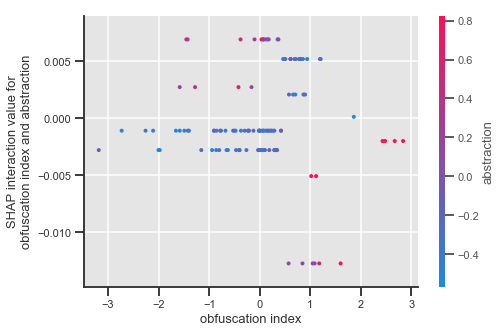

None


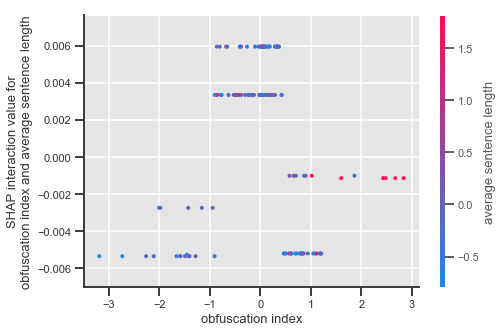

None


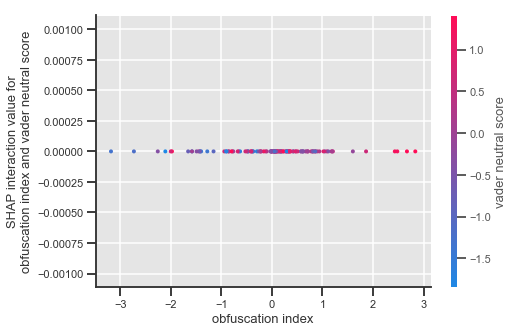

None


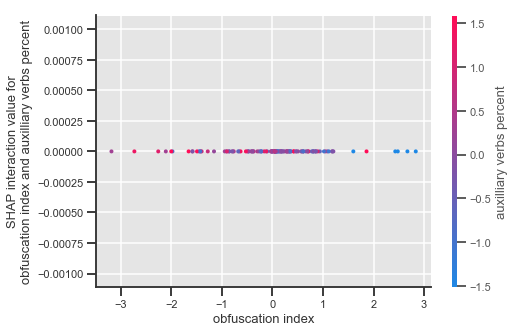

None


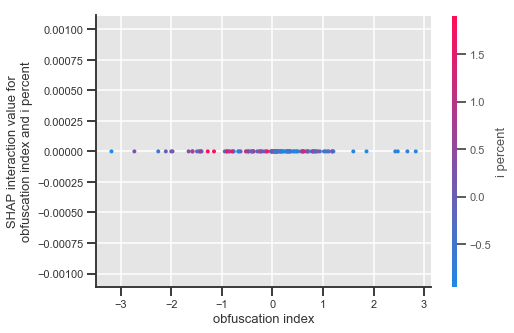

None


In [337]:
for f1 in rf_importance['Feature']: 
    for f2 in rf_importance['Feature']: 
        if f1 != f2:
            print(shap.dependence_plot((f1, f2),shap_interaction_values[1], X_s))
        else: 
            next
    break

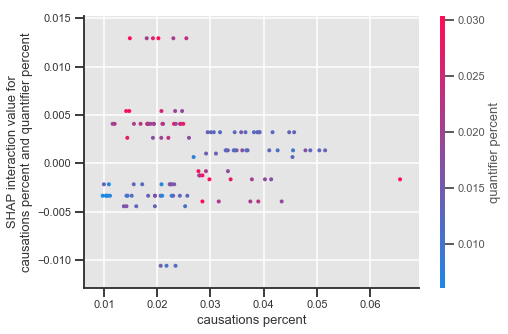

In [336]:
# cause quant 
shap.dependence_plot(
    ("causations percent", "quantifier percent"),
    shap_interaction_values[1], X
)

In [339]:
X.columns

Index(['function word percent', 'pronoun percent', 'personal pronoun percent',
       'i percent', 'we percent', 'you percent', 'she he percent',
       'they percent', 'impersonal pronoun percent', 'article percent',
       'prepositions percent', 'auxilliary verbs percent', 'adverb percent',
       'conjunction words percent', 'negatations percent',
       'quantifier percent', 'detect percent', 'causations percent',
       'positive emotion percent', 'average sentence length',
       'unique words percentage', 'flesch-kincaid score',
       'vader negative score', 'vader positive score', 'vader neutral score',
       'vader compound score', 'jargon', 'abstraction', 'obfuscation index'],
      dtype='object')

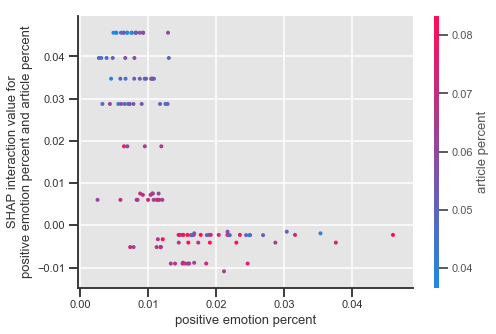

In [340]:
shap.dependence_plot(
    ("positive emotion percent", "article percent"),
    shap_interaction_values[1], X
)

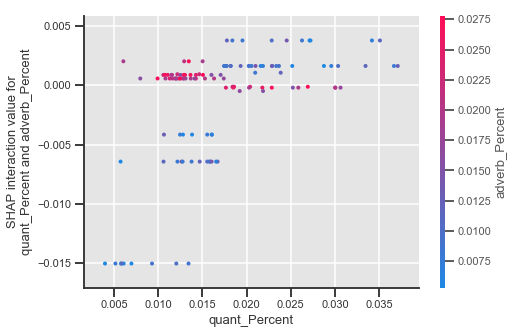

In [197]:
# quant adverb
shap.dependence_plot(
    ("quant_Percent", "adverb_Percent"),
    shap_interaction_values[1], X
)